<a href="https://colab.research.google.com/github/yavuzselimikizler/Machine-Learning/blob/main/hw3_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import numpy as np
import math 

In [ ]:
(train_X, train_Y) ,(test_X, test_y)= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(len(train_X))
print(len(test_X))
print(train_X.shape)
print(train_Y[0])
print(type(train_Y))


60000
10000
(60000, 28, 28)
5
<class 'numpy.ndarray'>


In [ ]:
from sklearn.model_selection import StratifiedKFold
full_data=np.array_split(train_X, 5)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

s1 = np.random.choice(range(len(train_X)), 1000, replace=False)
"""for train_index in skf.split(train_X,train_Y):
  print(len(train_index[0]))"""
"""train_x=train_X[train_index,:,:]
   train_x=train_Y[train_index,:,:]"""

train_x=train_X[s1,:,:]
train_y=train_Y[s1]
print(len(train_x))
#print(train_x[0])
print(train_y[0])
print(train_Y[0])
#print(len(train_x))
#print(len(train_y))


1000
1
5


In [ ]:

 
def PCA(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
x_train=[]
y_train=[]
new_list=[]
#print(train_x[0])
for j in  train_x:
  new_list.append(j.flatten())
new_list=np.array(new_list)

scaler = MinMaxScaler()
new_list = scaler.fit_transform(new_list)
#print(new_list[0])
pca = PCA(n_components = 0.99)
  
x_train = pca.fit_transform(new_list)
#x_train=PCA(new_list ,5)

for i in range(len(new_list)):

 
 y_train.append(train_y[i])
 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import KernelPCA
x_train=[]
y_train=[]
new_list=[]
#print(train_x[0])
for j in  train_x:
  new_list.append(j.flatten())
new_list=np.array(new_list)

scaler = MinMaxScaler()
new_list = scaler.fit_transform(new_list)
#print(new_list[0])
pca = KernelPCA(284)
  
x_train = pca.fit_transform(new_list)
#x_train=PCA(new_list ,5)

for i in range(len(new_list)):

 
 y_train.append(train_y[i])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
data_train, data_test, labels_train, labels_test = train_test_split(new_list, y_train, test_size=0.20, random_state=42)
data_train2, data_test2, labels_train2, labels_test2 = train_test_split(train_x, y_train, test_size=0.20, random_state=42)
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
classifier =  RandomForestClassifier(max_depth=None,n_estimators=250)

classifier.fit(data_train, labels_train)
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred=classifier.predict(data_test)
a=accuracy_score(labels_test, y_pred)
print("Current accuracy is {}%".format(a*100))

seed = 8
kfold = model_selection.KFold(n_splits = 3,
                       random_state = seed,shuffle=True)
# Model Accuracy, how often is the classifier correct?
b = model_selection.cross_val_score(classifier, new_list, y_train, cv = kfold)


print("Current accuracy is {}%".format(b.mean()*100))

Current accuracy is 91.5%
Current accuracy is 87.79647911384437%


In [ ]:
classifier2= RandomForestClassifier(max_depth=None,n_estimators=100)

classifier2.fit(data_train,labels_train)

y_pred2=classifier2.predict(data_test)

a=accuracy_score(labels_test, y_pred2)
print("Current accuracy is {}%".format(a*100))

seed = 8
kfold = model_selection.KFold(n_splits = 3,
                       random_state = seed,shuffle=True)
# Model Accuracy, how often is the classifier correct?
b = model_selection.cross_val_score(classifier2, new_list, y_train, cv = kfold)


print("Current accuracy is {}%".format(b.mean()*100))

Current accuracy is 91.0%
Current accuracy is 87.4979770189351%


In [ ]:
classifier3= RandomForestClassifier(max_depth=None,n_estimators=250)

classifier3.fit(data_train,labels_train)

y_pred3=classifier3.predict(data_test)

a=accuracy_score(labels_test, y_pred3)
print("Current accuracy is {}%".format(a*100))
seed = 8
kfold = model_selection.KFold(n_splits = 3,
                       random_state = seed,shuffle=True)
# Model Accuracy, how often is the classifier correct?
b = model_selection.cross_val_score(classifier3, new_list, y_train, cv = kfold)


print("Current accuracy is {}%".format(b.mean()*100))

Current accuracy is 92.0%
Current accuracy is 87.59807711903521%


In [ ]:
classifier4= RandomForestClassifier(max_depth=16,n_estimators=250)

classifier4.fit(data_train,labels_train)

y_pred4=classifier4.predict(data_test)

a=accuracy_score(labels_test, y_pred4)
print("Current accuracy is {}%".format(a*100))
seed = 8
kfold = model_selection.KFold(n_splits = 3,
                       random_state = seed,shuffle=True)
# Model Accuracy, how often is the classifier correct?
b = model_selection.cross_val_score(classifier4, new_list, y_train, cv = kfold)


print("Current accuracy is {}%".format(b.mean()*100))

Current accuracy is 92.5%
Current accuracy is 87.1976767186348%


In [ ]:
classifier5= RandomForestClassifier(max_depth=32,n_estimators=100)

classifier5.fit(data_train,labels_train)

y_pred5=classifier5.predict(data_test)

a=accuracy_score(labels_test, y_pred5)
print("Current accuracy is {}%".format(a*100))
seed = 8
kfold = model_selection.KFold(n_splits = 3,
                       random_state = seed,shuffle=True)
# Model Accuracy, how often is the classifier correct?
b = model_selection.cross_val_score(classifier5, new_list, y_train, cv = kfold)


print("Current accuracy is {}%".format(b.mean()*100))

Current accuracy is 91.5%
Current accuracy is 86.9968771166376%


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
final_model = VotingClassifier(
    estimators=[('xgk', classifier), ('xgz', classifier2),('xgb', classifier3),('rj', classifier4),('lr', classifier5)], voting='hard', weights=[1.8,1.1,1.6,1.0,1.2])

final_model.fit(data_train, labels_train)

y_pred = final_model.predict(data_test)
a=accuracy_score(labels_test, y_pred5)
print("Current accuracy is {}%".format(a*100))

seed = 8
kfold = model_selection.KFold(n_splits = 3,
                       random_state = seed,shuffle=True)
# Model Accuracy, how often is the classifier correct?
b = model_selection.cross_val_score(final_model, new_list, y_train, cv = kfold)


print("Current accuracy is {}%".format(b.mean()*100))


Current accuracy is 91.5%
Current accuracy is 87.59687831544119%


In [ ]:
from sklearn.neural_network import MLPClassifier

classifier6 = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(1, 495), random_state=1)

classifier6.fit(data_train,labels_train)

y_pred6 = classifier6.predict(data_test)
a=accuracy_score(labels_test, y_pred6)
print("Current accuracy is {}%".format(a*100))
"""
seed = 8
kfold = model_selection.KFold(n_splits = 3,
                       random_state = seed,shuffle=True)
# Model Accuracy, how often is the classifier correct?
b = model_selection.cross_val_score(classifier6, new_list, y_train, cv = kfold)


print("Current accuracy is {}%".format(b.mean()*100))"""

Current accuracy is 39.0%


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


'\nseed = 8\nkfold = model_selection.KFold(n_splits = 3,\n                       random_state = seed,shuffle=True)\n# Model Accuracy, how often is the classifier correct?\nb = model_selection.cross_val_score(classifier6, new_list, y_train, cv = kfold)\n\n\nprint("Current accuracy is {}%".format(b.mean()*100))'

In [ ]:
def most_repeated(value_list):
  repeate_numbers=[]
  
  for i in range(len(value_list)):
    counter=0
    for j in range(len(value_list)):
      if value_list[i]== value_list[j]:
        counter+=1
    repeate_numbers.append(counter)

  value=max(repeate_numbers)
  est_index=repeate_numbers.index(value) 
  return est_index 

In [ ]:
y_pred_real=[]
pnum=0
nnum=0
for i in range(len(labels_test)):
  estimated_values=[]
 
  estimated_values.append(y_pred[i])
  estimated_values.append(y_pred2[i])
  estimated_values.append(y_pred3[i])
  estimated_values.append(y_pred4[i])
  estimated_values.append(y_pred5[i])
  
  y_pred_real.append(estimated_values[most_repeated(estimated_values)])
  

a=accuracy_score(labels_test, y_pred_real)
print("Current accuracy is {}%".format(a*100))

Current accuracy is 96.975%


In [ ]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [ ]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
    
}

cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(data_train,labels_train)
display(cv)

Best parameters are: {'max_depth': 32, 'n_estimators': 250}


0.498 + or -0.029 for the {'max_depth': 2, 'n_estimators': 5}
0.545 + or -0.03 for the {'max_depth': 2, 'n_estimators': 10}
0.625 + or -0.019 for the {'max_depth': 2, 'n_estimators': 50}
0.629 + or -0.017 for the {'max_depth': 2, 'n_estimators': 100}
0.635 + or -0.007 for the {'max_depth': 2, 'n_estimators': 250}
0.682 + or -0.023 for the {'max_depth': 4, 'n_estimators': 5}
0.741 + or -0.006 for the {'max_depth': 4, 'n_estimators': 10}
0.803 + or -0.005 for the {'max_depth': 4, 'n_estimators': 50}
0.815 + or -0.005 for the {'max_depth': 4, 'n_estimators': 100}
0.816 + or -0.003 for the {'max_depth': 4, 'n_estimators': 250}
0.865 + or -0.003 for the {'max_depth': 8, 'n_estimators': 5}
0.895 + or -0.003 for the {'max_depth': 8, 'n_estimators': 10}
0.919 + or -0.001 for the {'max_depth': 8, 'n_estimators': 50}
0.923 + or -0.002 for the {'max_depth': 8, 'n_estimators': 100}
0.926 + or -0.001 for the {'max_depth': 8, 'n_estimator

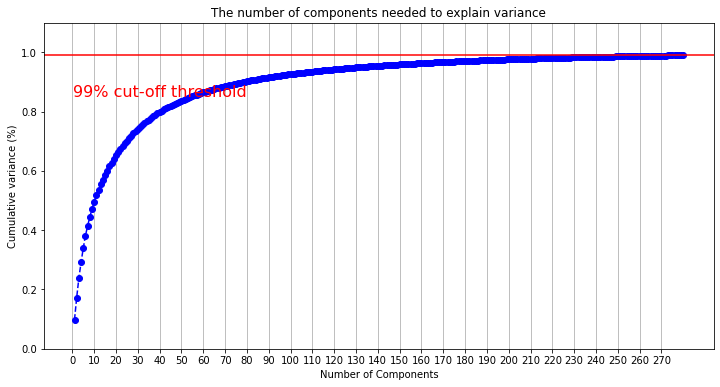

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 281, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 280, step=10)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.5, 0.85, '99% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

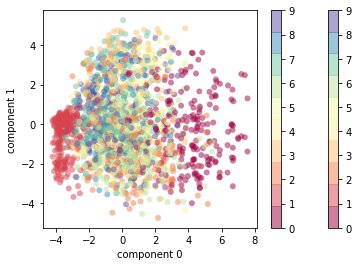

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x_train[:, 0],x_train[:, 1], #[0 for i in range(len(projected))]
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 0')
plt.ylabel('component 1')
plt.colorbar();



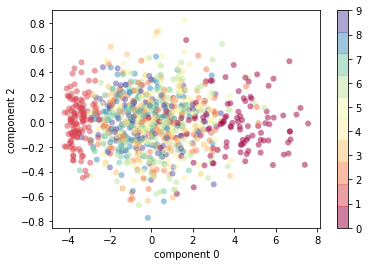

In [ ]:
plt.scatter(x_train[:, 0],x_train[:, 100], #[0 for i in range(len(projected))]
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 0')
plt.ylabel('component 2')
plt.colorbar();

In [ ]:
x_train=np.array(x_train)
print(x_train.shape)
print(x_train[0][0])
new_list=np.array(new_list)
print(new_list.shape)

(1000, 284)
-3.3577968799330917
(1000, 784)


In [ ]:
from sklearn.model_selection import train_test_split

data_train, data_test, labels_train, labels_test = train_test_split(x_train, y_train, test_size=0.20, random_state=42)
data_train2, data_test2, labels_train2, labels_test2 = train_test_split(train_x, y_train, test_size=0.20, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

data_train = sc.fit_transform(data_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
accuracy_score_list=[]

def find_best():
  for i in range(1,200):
    accuracy_values=[]
    for j in range(0,4):
     classifier = RandomForestClassifier(n_estimators=i)
    
     classifier.fit(data_train, labels_train)
     y_pred=classifier.predict(data_test)
     a=accuracy_score(labels_test, y_pred)
     accuracy_values.append(a)
    b=sum(accuracy_values)/len(accuracy_values)
    accuracy_score_list.append(b)

  value=max(accuracy_score_list)
  est_index=accuracy_score_list.index(value)
  print(est_index)
  return est_index

In [ ]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [ ]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
    
}

cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(data_train,labels_train)
display(cv)

Best parameters are: {'max_depth': None, 'n_estimators': 250}


0.328 + or -0.023 for the {'max_depth': 2, 'n_estimators': 5}
0.359 + or -0.04 for the {'max_depth': 2, 'n_estimators': 10}
0.479 + or -0.043 for the {'max_depth': 2, 'n_estimators': 50}
0.548 + or -0.025 for the {'max_depth': 2, 'n_estimators': 100}
0.512 + or -0.018 for the {'max_depth': 2, 'n_estimators': 250}
0.398 + or -0.034 for the {'max_depth': 4, 'n_estimators': 5}
0.496 + or -0.046 for the {'max_depth': 4, 'n_estimators': 10}
0.656 + or -0.029 for the {'max_depth': 4, 'n_estimators': 50}
0.705 + or -0.044 for the {'max_depth': 4, 'n_estimators': 100}
0.754 + or -0.021 for the {'max_depth': 4, 'n_estimators': 250}
0.415 + or -0.025 for the {'max_depth': 8, 'n_estimators': 5}
0.476 + or -0.042 for the {'max_depth': 8, 'n_estimators': 10}
0.709 + or -0.022 for the {'max_depth': 8, 'n_estimators': 50}
0.76 + or -0.025 for the {'max_depth': 8, 'n_estimators': 100}
0.799 + or -0.017 for the {'max_depth': 8, 'n_estimato

In [ ]:
print(RandomForestClassifier())

RandomForestClassifier()


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#best_est=find_best()
labels_train=np.array(labels_train)
s1 = np.random.choice(range(len(data_train)),math.floor(len(data_train)/3) , replace=False)
data_train1=data_train[s1,:]

labels_train1=labels_train[s1]
s2 = np.random.choice(range(len(data_train)),math.floor(len(data_train)/3) , replace=False)
data_train2=data_train[s2,:]

labels_train2=labels_train[s2]
s3 = np.random.choice(range(len(data_train)),math.floor(len(data_train)/3) , replace=False)
data_train3=data_train[s3,:]
print(len(data_train3))

labels_train3=labels_train[s3]
"""
s4 = np.random.choice(range(len(data_train)),math.floor(len(data_train)/5) , replace=False)
data_train4=data_train[s4,:]

labels_train4=labels_train[s4]
s5 = np.random.choice(range(len(data_train)),math.floor(len(data_train)/5) , replace=False)
data_train5=data_train[s5,:]
labels_train5=labels_train[s5]
"""
classifier = RandomForestClassifier(criterion='entropy',max_depth=None,n_estimators=250)

"""
classifier.fit(data_train1, labels_train1)
y_pred1=classifier.predict(data_test)

classifier.fit(data_train2, labels_train2)
y_pred2=classifier.predict(data_test)

classifier.fit(data_train3, labels_train3)
y_pred3=classifier.predict(data_test)
"""
"""
classifier.fit(data_train4, labels_train4)
y_pred4=classifier.predict(data_test)

classifier.fit(data_train5, labels_train5)
y_pred5=classifier.predict(data_test)
"""
"""
y_pred=[]
pnum=0
nnum=0
for i in range(len(data_test)):
  if y_pred1[i]==1:
    pnum+=1
  else:
    nnum+=1
  if y_pred2[i]==1:
    pnum+=1
  else:
    nnum+=1
  if y_pred3[i]==1:
    pnum+=1
  else:
    nnum+=1
 
  if pnum>nnum:
    y_pred.append(1)
  else:
    y_pred.append(0)

  pnum=0
  nnum=0

a=accuracy_score(labels_test, y_pred)
print("Current accuracy is {}%".format(a*100))"""
classifier.fit(data_train,labels_train)

266


RandomForestClassifier(criterion='entropy', n_estimators=250)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred=classifier.predict(data_test)
a=accuracy_score(labels_test, y_pred)
print("Current accuracy is {}%".format(a*100))

Current accuracy is 66.5%


prediction: {} , result: {} 1 1


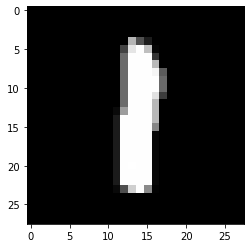

prediction: {} , result: {} 7 7


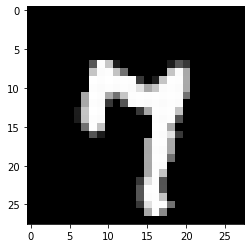

prediction: {} , result: {} 6 6


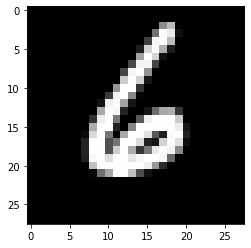

prediction: {} , result: {} 5 5


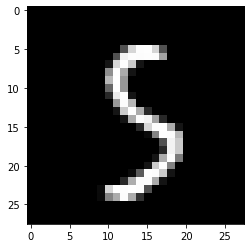

prediction: {} , result: {} 9 9


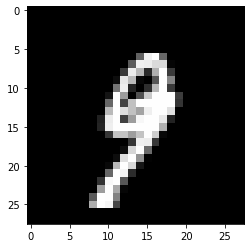

prediction: {} , result: {} 6 6


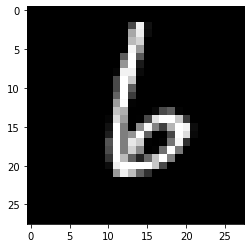

prediction: {} , result: {} 4 4


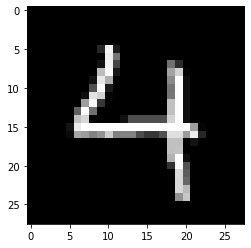

prediction: {} , result: {} 6 6


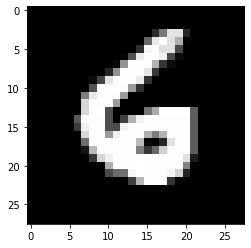

prediction: {} , result: {} 9 9


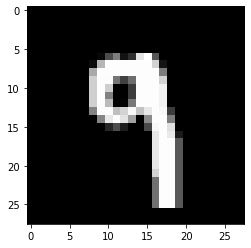

prediction: {} , result: {} 0 0


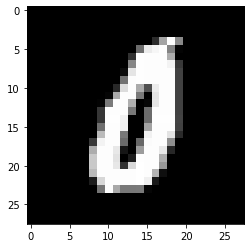

prediction: {} , result: {} 8 8


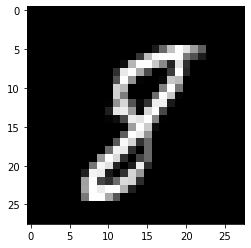

prediction: {} , result: {} 4 4


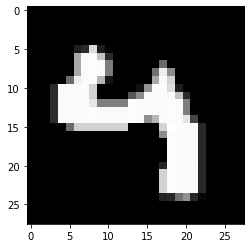

prediction: {} , result: {} 1 1


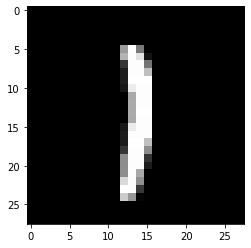

prediction: {} , result: {} 8 8


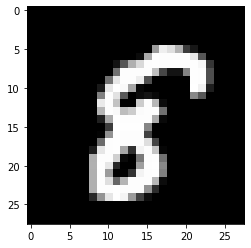

prediction: {} , result: {} 0 0


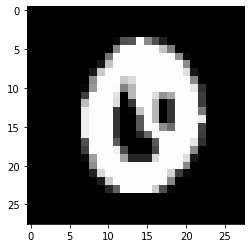

prediction: {} , result: {} 9 9


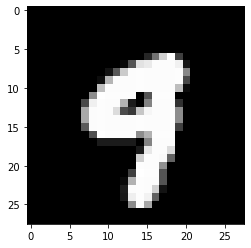

prediction: {} , result: {} 7 7


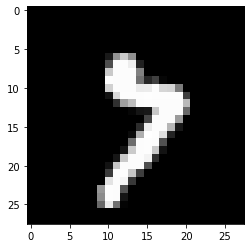

prediction: {} , result: {} 2 2


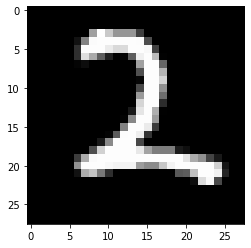

prediction: {} , result: {} 5 5


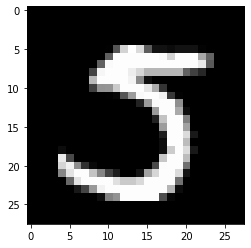

prediction: {} , result: {} 3 3


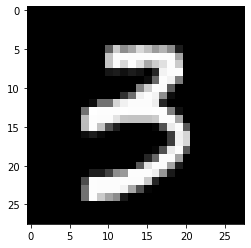

prediction: {} , result: {} 0 0


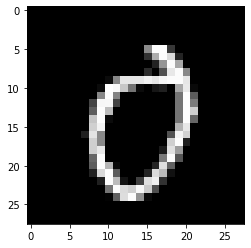

prediction: {} , result: {} 6 6


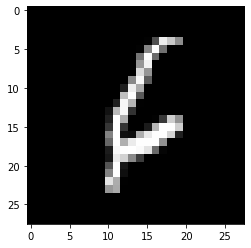

prediction: {} , result: {} 7 7


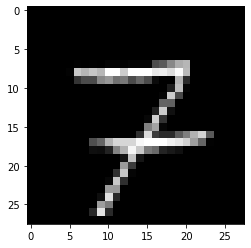

prediction: {} , result: {} 7 7


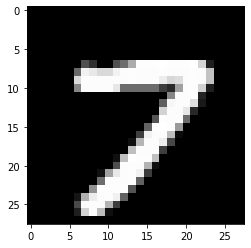

prediction: {} , result: {} 1 1


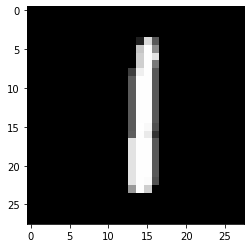

prediction: {} , result: {} 7 7


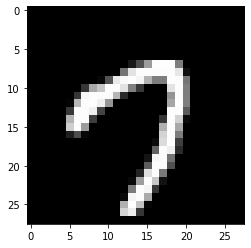

prediction: {} , result: {} 6 6


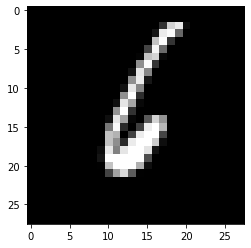

prediction: {} , result: {} 4 4


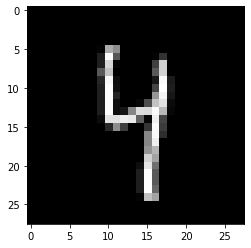

prediction: {} , result: {} 3 3


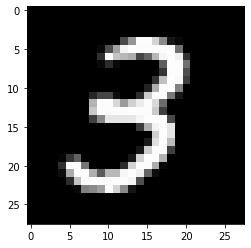

prediction: {} , result: {} 3 3


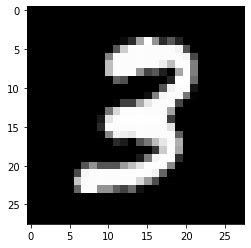

prediction: {} , result: {} 5 5


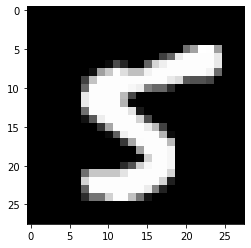

prediction: {} , result: {} 8 8


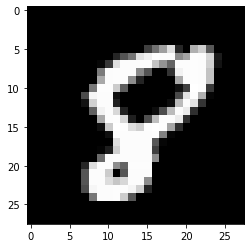

prediction: {} , result: {} 7 7


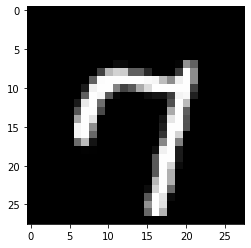

prediction: {} , result: {} 8 8


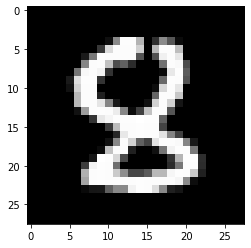

prediction: {} , result: {} 1 1


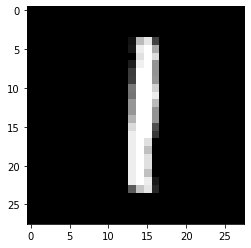

prediction: {} , result: {} 6 6


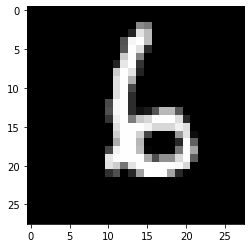

prediction: {} , result: {} 1 1


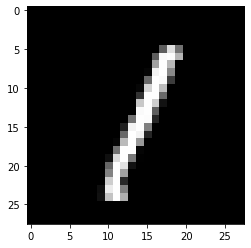

prediction: {} , result: {} 1 1


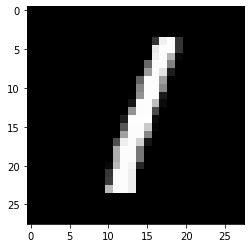

prediction: {} , result: {} 3 3


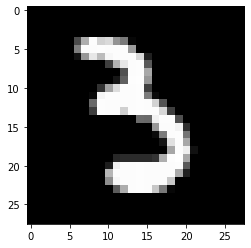

prediction: {} , result: {} 4 4


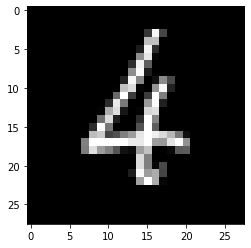

prediction: {} , result: {} 9 5


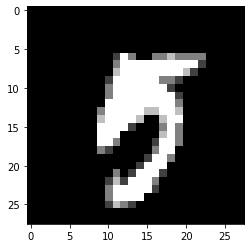

prediction: {} , result: {} 4 4


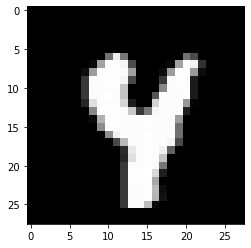

prediction: {} , result: {} 1 1


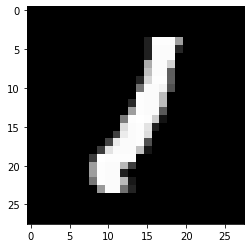

prediction: {} , result: {} 6 6


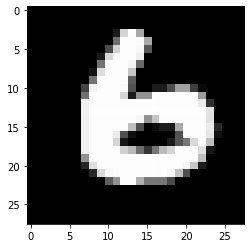

prediction: {} , result: {} 6 6


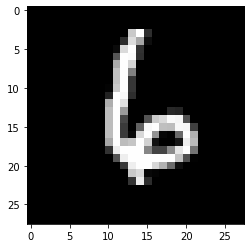

prediction: {} , result: {} 0 0


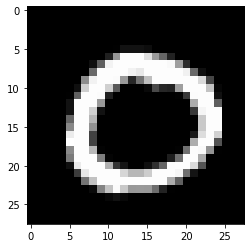

prediction: {} , result: {} 5 5


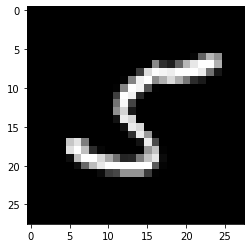

prediction: {} , result: {} 5 5


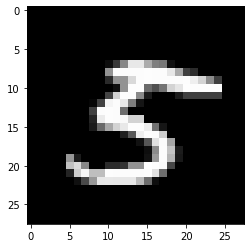

prediction: {} , result: {} 1 1


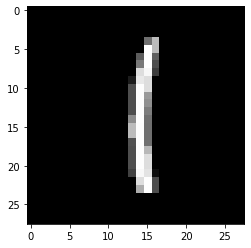

prediction: {} , result: {} 9 9


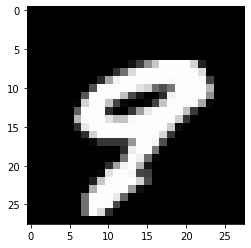

prediction: {} , result: {} 0 0


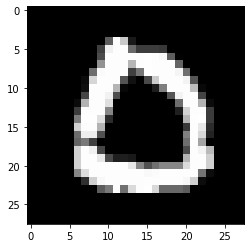

prediction: {} , result: {} 0 0


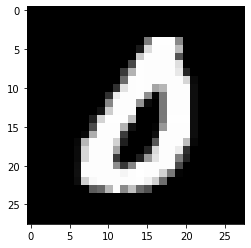

prediction: {} , result: {} 7 7


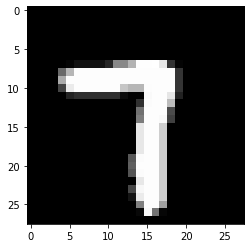

prediction: {} , result: {} 4 4


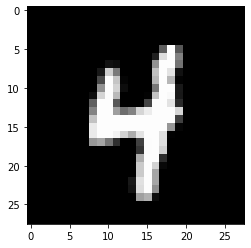

prediction: {} , result: {} 5 5


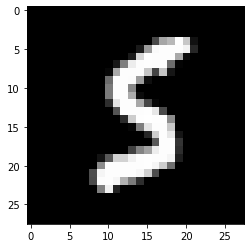

prediction: {} , result: {} 4 4


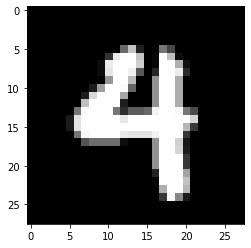

prediction: {} , result: {} 4 4


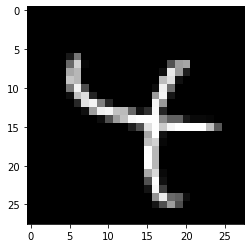

prediction: {} , result: {} 9 9


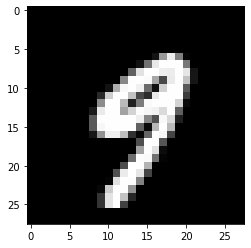

prediction: {} , result: {} 6 6


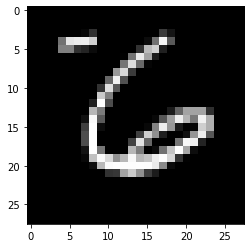

prediction: {} , result: {} 7 7


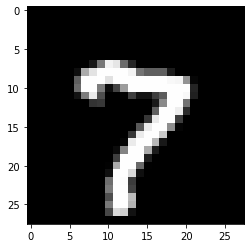

prediction: {} , result: {} 7 7


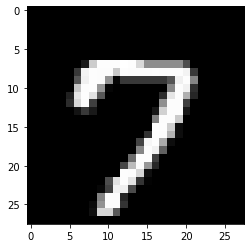

prediction: {} , result: {} 6 6


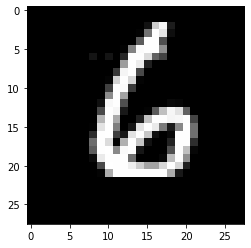

prediction: {} , result: {} 0 0


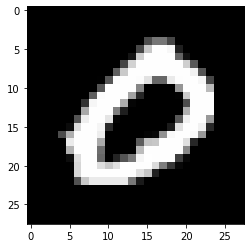

prediction: {} , result: {} 3 3


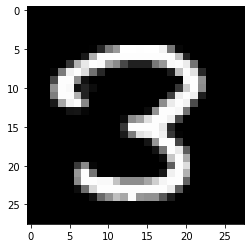

prediction: {} , result: {} 2 2


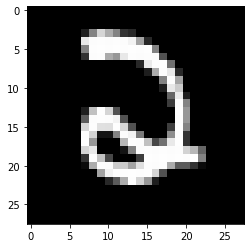

prediction: {} , result: {} 3 3


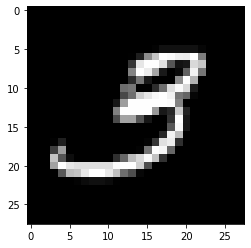

prediction: {} , result: {} 7 7


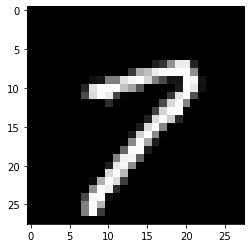

prediction: {} , result: {} 7 7


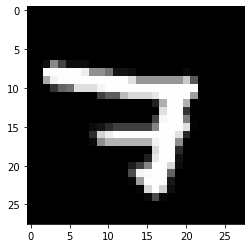

prediction: {} , result: {} 2 2


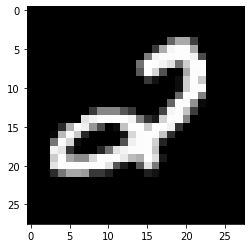

prediction: {} , result: {} 3 3


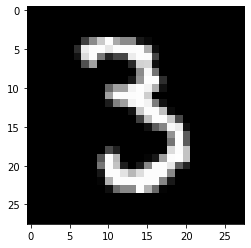

prediction: {} , result: {} 7 7


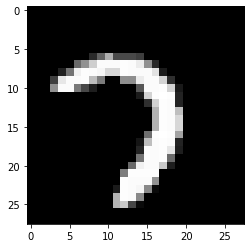

prediction: {} , result: {} 7 9


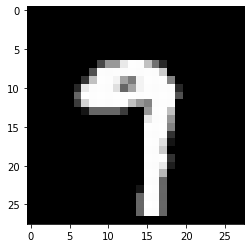

prediction: {} , result: {} 3 3


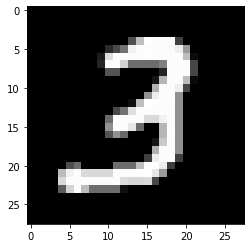

prediction: {} , result: {} 9 9


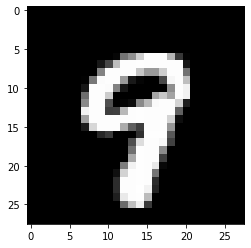

prediction: {} , result: {} 8 8


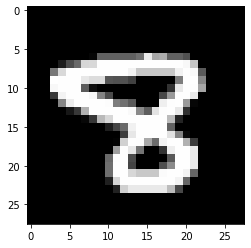

prediction: {} , result: {} 8 8


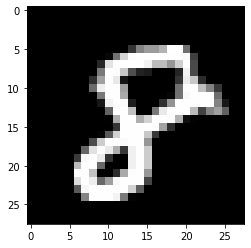

prediction: {} , result: {} 6 6


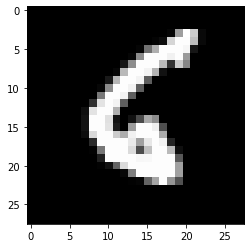

prediction: {} , result: {} 4 4


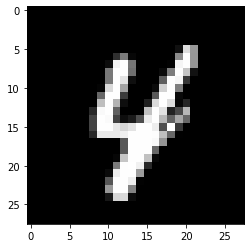

prediction: {} , result: {} 5 5


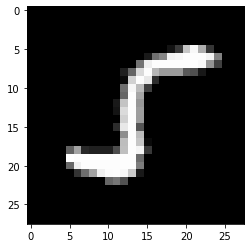

prediction: {} , result: {} 5 5


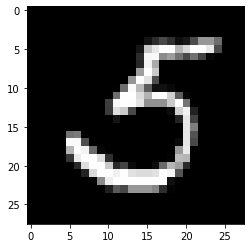

prediction: {} , result: {} 1 1


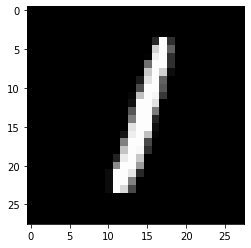

prediction: {} , result: {} 8 8


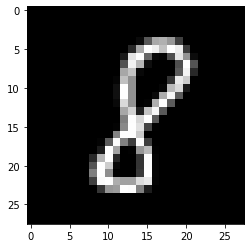

prediction: {} , result: {} 5 5


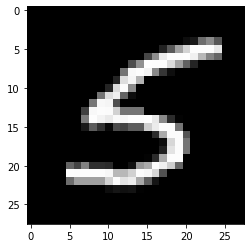

prediction: {} , result: {} 8 8


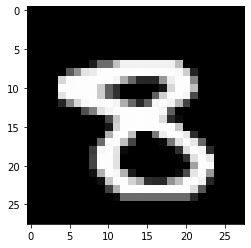

prediction: {} , result: {} 1 1


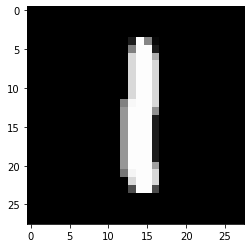

prediction: {} , result: {} 7 7


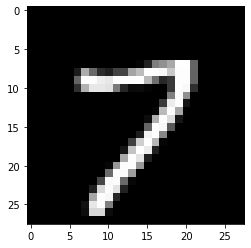

prediction: {} , result: {} 2 2


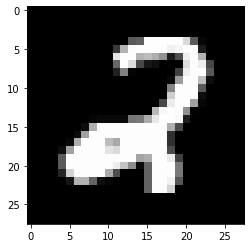

prediction: {} , result: {} 5 5


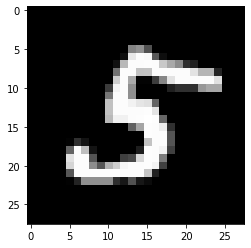

prediction: {} , result: {} 4 4


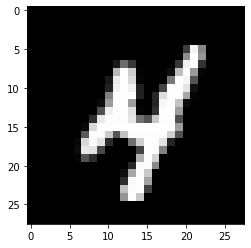

prediction: {} , result: {} 6 6


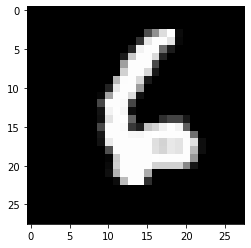

prediction: {} , result: {} 1 1


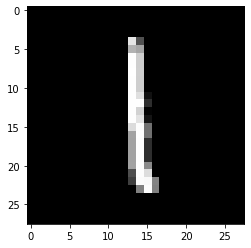

prediction: {} , result: {} 0 0


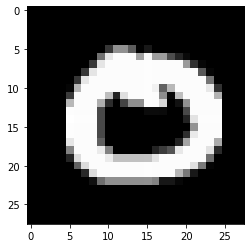

prediction: {} , result: {} 2 2


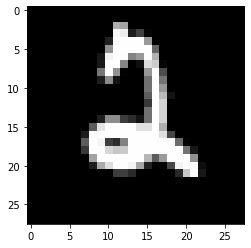

prediction: {} , result: {} 4 4


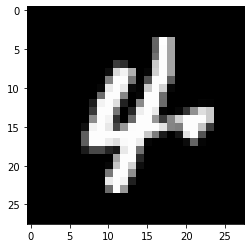

prediction: {} , result: {} 9 9


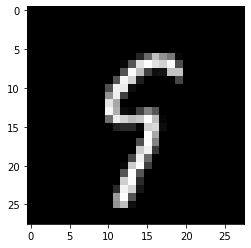

prediction: {} , result: {} 2 2


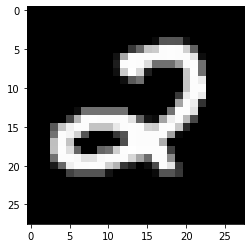

prediction: {} , result: {} 3 3


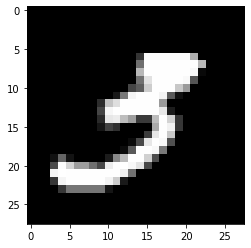

prediction: {} , result: {} 4 4


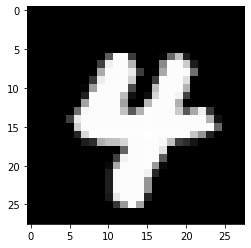

prediction: {} , result: {} 5 5


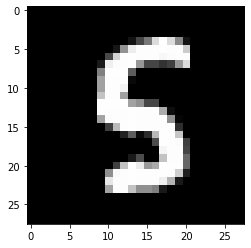

prediction: {} , result: {} 3 3


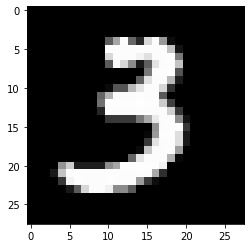

prediction: {} , result: {} 9 9


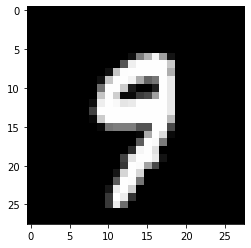

prediction: {} , result: {} 7 7


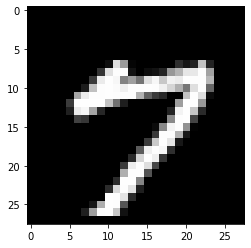

prediction: {} , result: {} 6 6


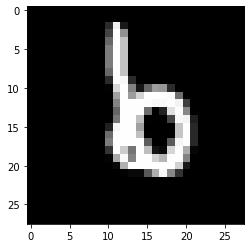

prediction: {} , result: {} 0 0


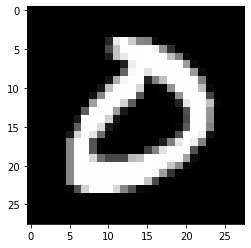

prediction: {} , result: {} 2 2


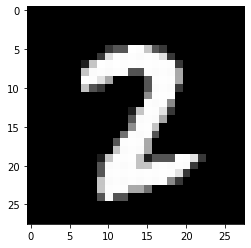

prediction: {} , result: {} 2 2


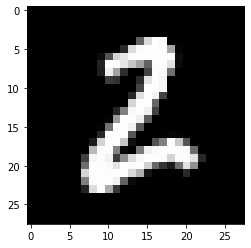

prediction: {} , result: {} 3 3


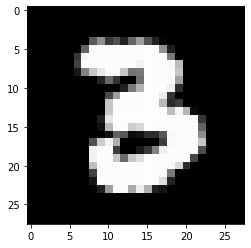

prediction: {} , result: {} 5 5


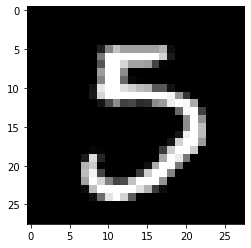

prediction: {} , result: {} 4 4


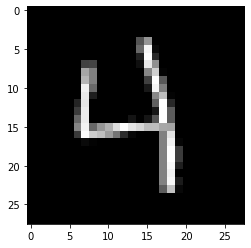

prediction: {} , result: {} 6 6


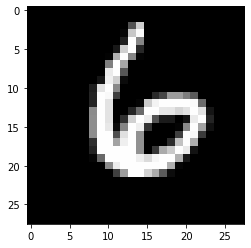

prediction: {} , result: {} 7 7


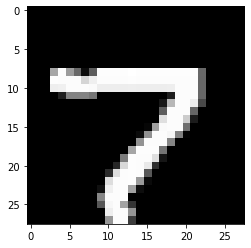

prediction: {} , result: {} 7 7


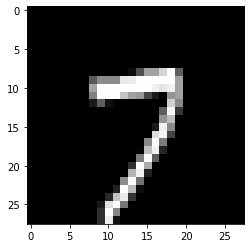

prediction: {} , result: {} 2 2


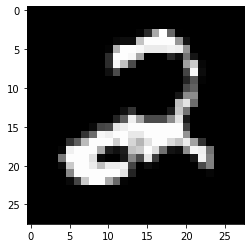

prediction: {} , result: {} 2 2


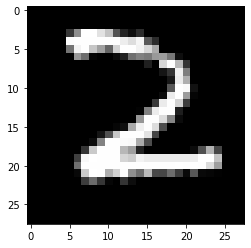

prediction: {} , result: {} 1 1


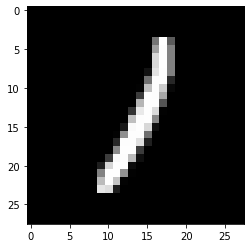

prediction: {} , result: {} 5 5


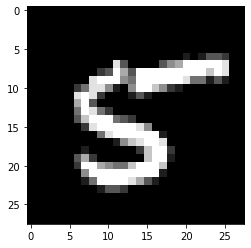

prediction: {} , result: {} 1 1


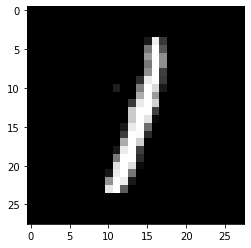

prediction: {} , result: {} 6 6


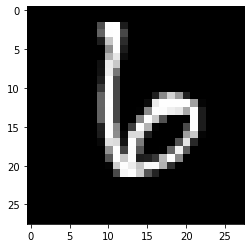

prediction: {} , result: {} 0 0


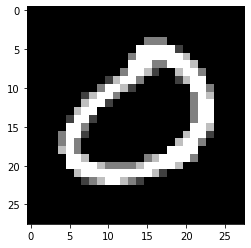

prediction: {} , result: {} 9 9


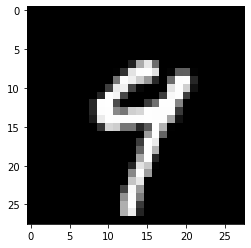

prediction: {} , result: {} 1 1


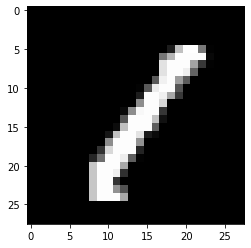

prediction: {} , result: {} 3 3


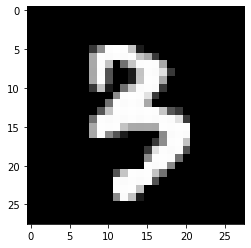

prediction: {} , result: {} 0 0


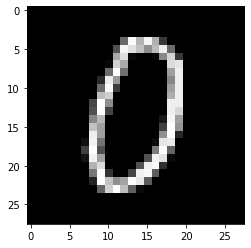

prediction: {} , result: {} 3 3


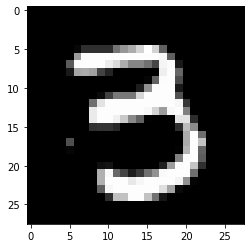

prediction: {} , result: {} 5 5


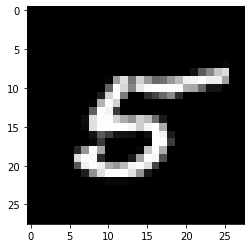

prediction: {} , result: {} 2 2


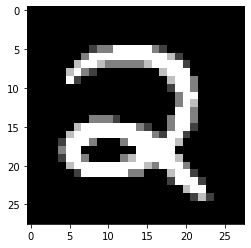

prediction: {} , result: {} 2 2


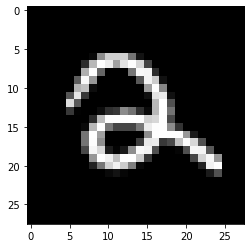

prediction: {} , result: {} 0 0


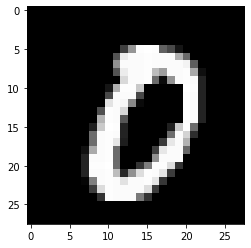

prediction: {} , result: {} 1 6


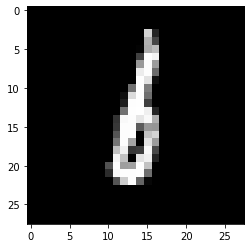

prediction: {} , result: {} 0 0


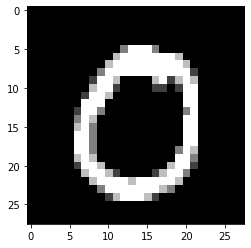

prediction: {} , result: {} 9 9


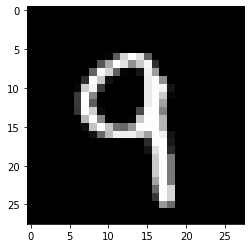

prediction: {} , result: {} 8 8


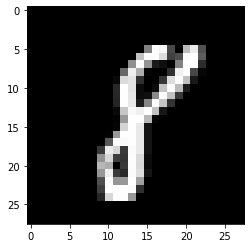

prediction: {} , result: {} 8 8


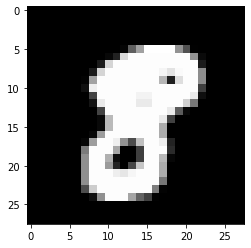

prediction: {} , result: {} 5 5


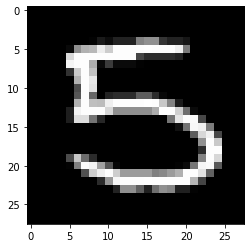

prediction: {} , result: {} 6 6


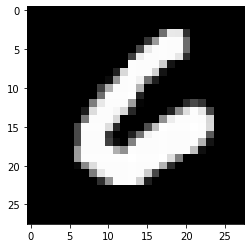

prediction: {} , result: {} 1 1


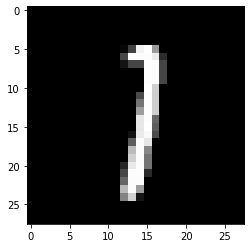

prediction: {} , result: {} 3 3


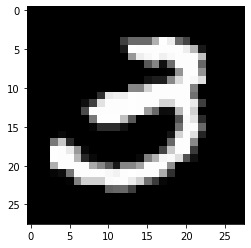

prediction: {} , result: {} 5 5


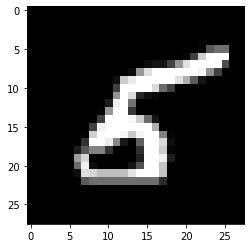

prediction: {} , result: {} 1 1


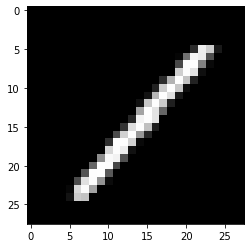

prediction: {} , result: {} 5 5


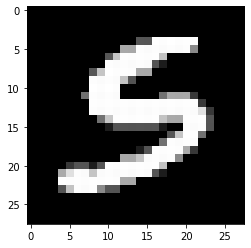

prediction: {} , result: {} 5 5


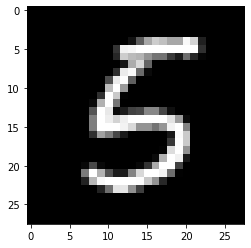

prediction: {} , result: {} 0 0


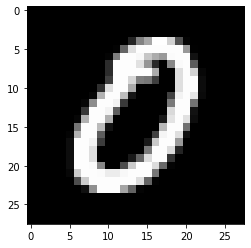

prediction: {} , result: {} 1 1


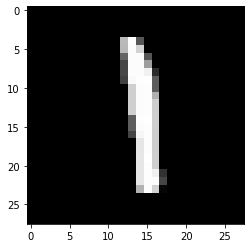

prediction: {} , result: {} 9 9


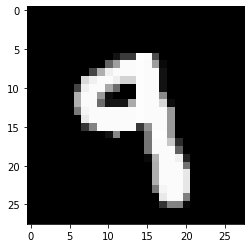

prediction: {} , result: {} 6 6


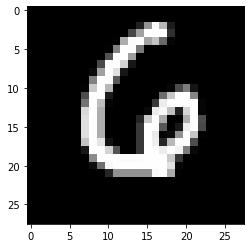

prediction: {} , result: {} 0 0


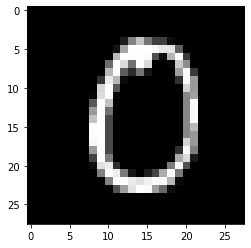

prediction: {} , result: {} 8 8


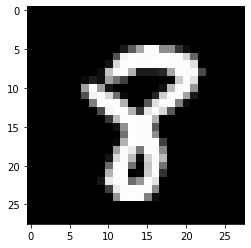

prediction: {} , result: {} 4 4


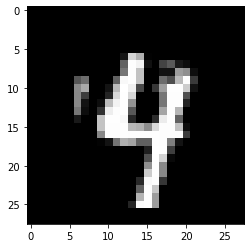

prediction: {} , result: {} 9 9


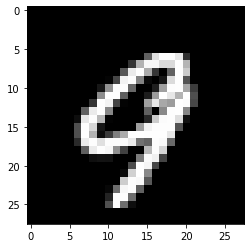

prediction: {} , result: {} 3 3


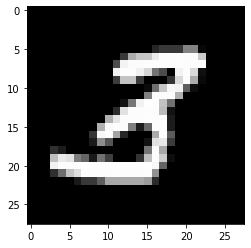

prediction: {} , result: {} 9 9


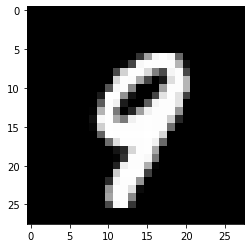

prediction: {} , result: {} 5 5


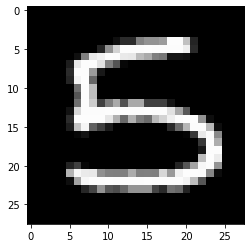

prediction: {} , result: {} 3 3


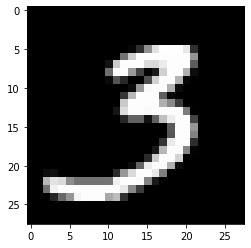

prediction: {} , result: {} 0 0


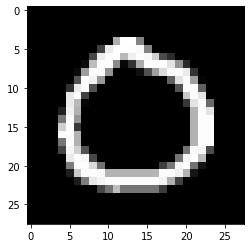

prediction: {} , result: {} 2 2


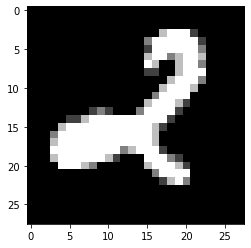

prediction: {} , result: {} 5 5


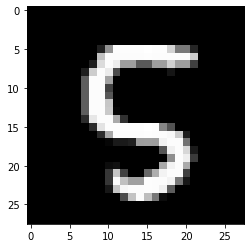

prediction: {} , result: {} 2 2


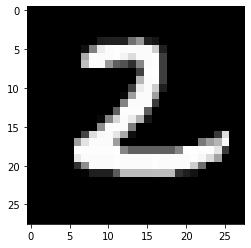

prediction: {} , result: {} 6 6


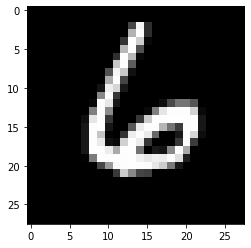

prediction: {} , result: {} 7 7


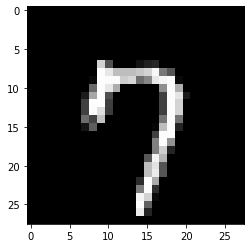

prediction: {} , result: {} 4 4


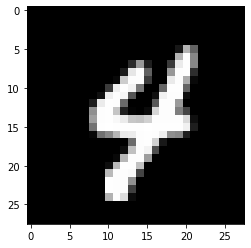

prediction: {} , result: {} 3 3


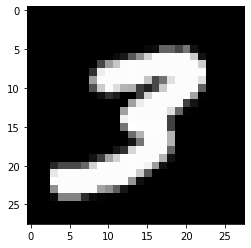

prediction: {} , result: {} 8 8


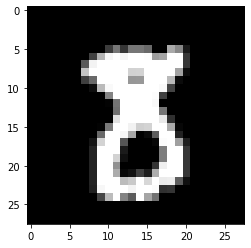

prediction: {} , result: {} 6 6


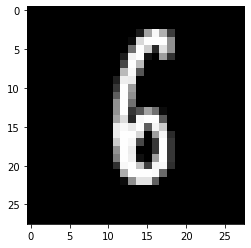

prediction: {} , result: {} 1 1


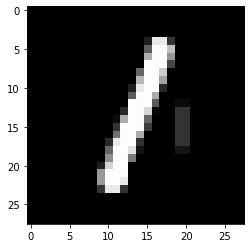

prediction: {} , result: {} 9 9


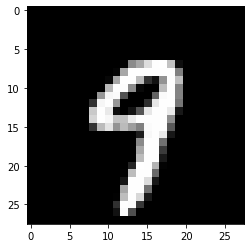

prediction: {} , result: {} 6 6


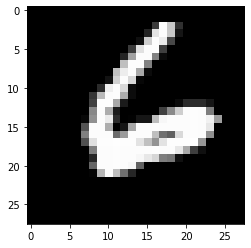

prediction: {} , result: {} 9 9


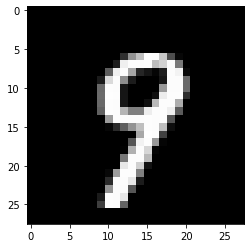

prediction: {} , result: {} 3 3


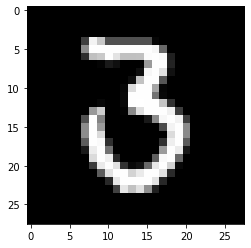

prediction: {} , result: {} 0 0


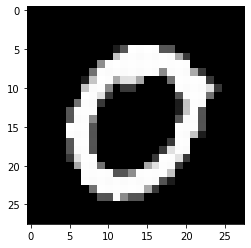

prediction: {} , result: {} 0 0


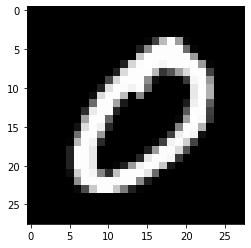

prediction: {} , result: {} 1 1


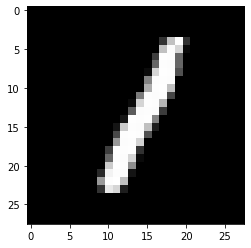

prediction: {} , result: {} 9 9


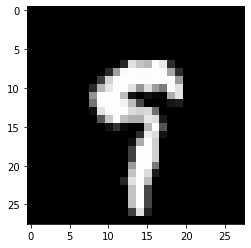

prediction: {} , result: {} 4 4


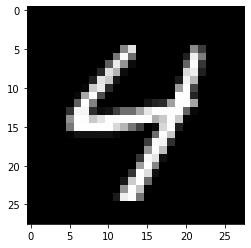

prediction: {} , result: {} 0 0


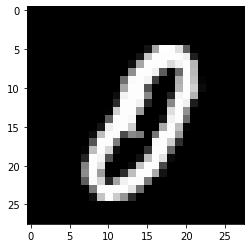

prediction: {} , result: {} 9 4


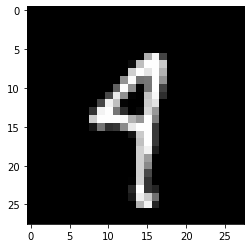

prediction: {} , result: {} 2 2


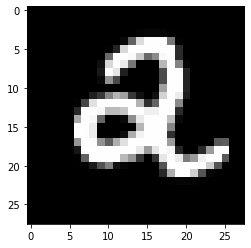

prediction: {} , result: {} 8 8


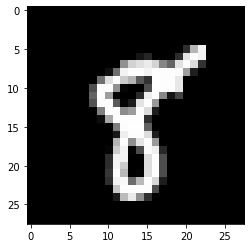

prediction: {} , result: {} 3 3


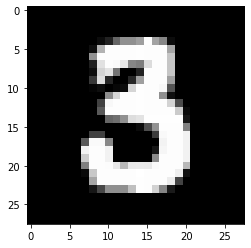

prediction: {} , result: {} 4 4


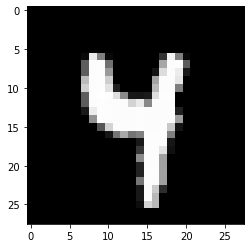

prediction: {} , result: {} 0 0


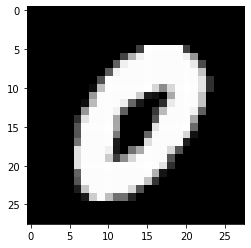

prediction: {} , result: {} 8 8


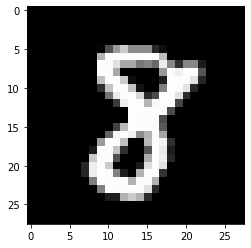

prediction: {} , result: {} 3 3


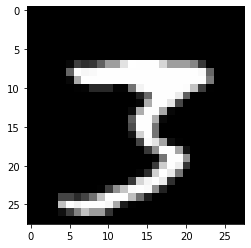

prediction: {} , result: {} 2 2


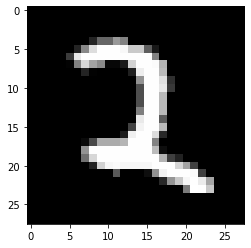

prediction: {} , result: {} 4 8


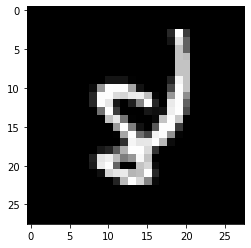

prediction: {} , result: {} 9 9


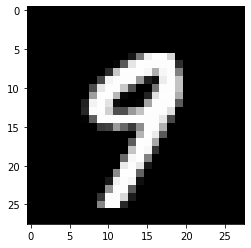

prediction: {} , result: {} 3 3


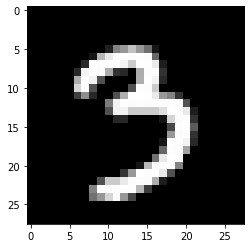

prediction: {} , result: {} 7 7


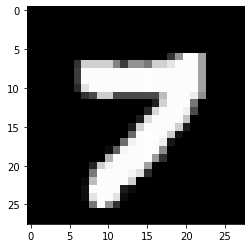

prediction: {} , result: {} 5 5


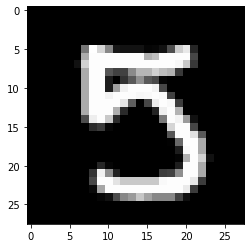

prediction: {} , result: {} 8 8


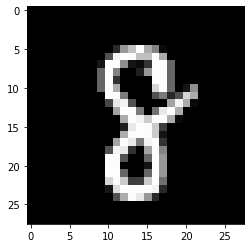

prediction: {} , result: {} 2 2


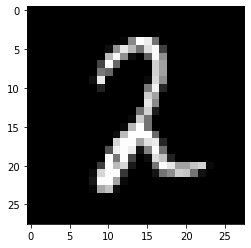

prediction: {} , result: {} 6 6


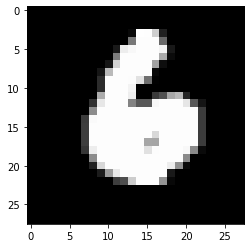

prediction: {} , result: {} 8 8


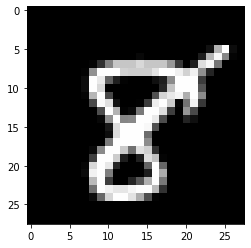

prediction: {} , result: {} 1 1


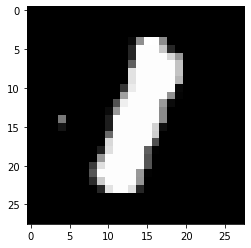

prediction: {} , result: {} 2 2


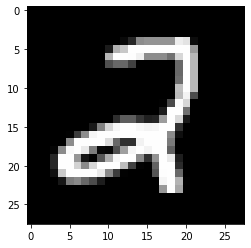

prediction: {} , result: {} 5 5


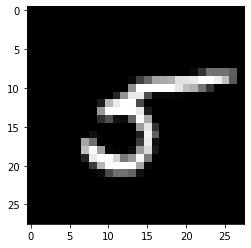

prediction: {} , result: {} 0 0


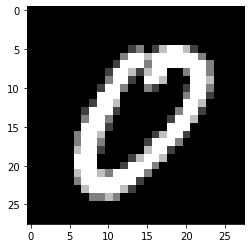

prediction: {} , result: {} 0 0


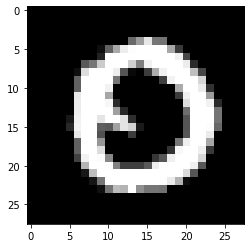

prediction: {} , result: {} 9 9


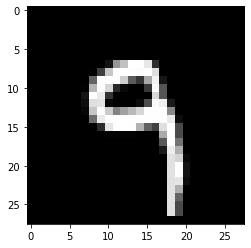

prediction: {} , result: {} 1 1


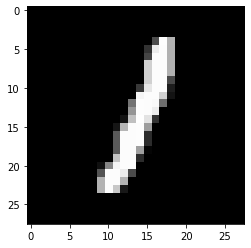

prediction: {} , result: {} 5 5


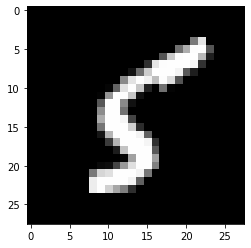

prediction: {} , result: {} 1 1


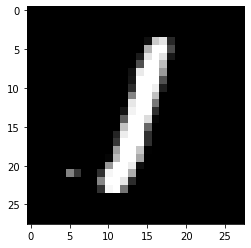

prediction: {} , result: {} 6 6


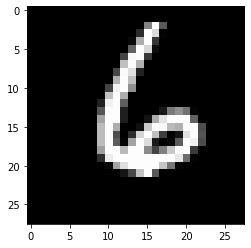

prediction: {} , result: {} 5 5


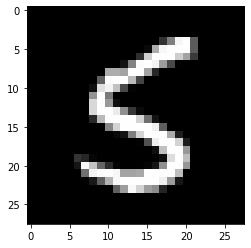

prediction: {} , result: {} 4 4


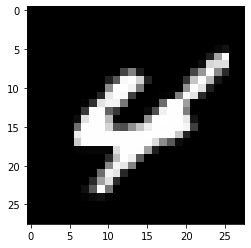

prediction: {} , result: {} 6 6


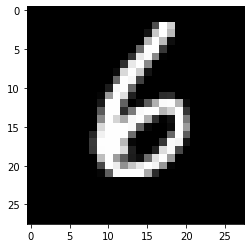

prediction: {} , result: {} 0 0


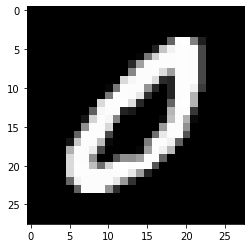

prediction: {} , result: {} 6 6


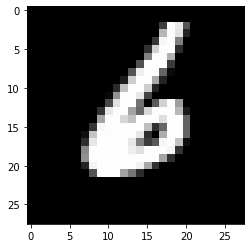

prediction: {} , result: {} 9 9


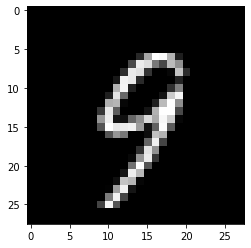

prediction: {} , result: {} 4 4


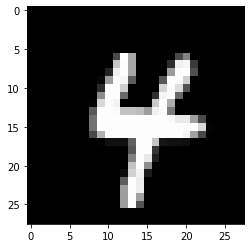

prediction: {} , result: {} 1 1


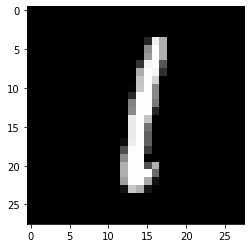

prediction: {} , result: {} 4 4


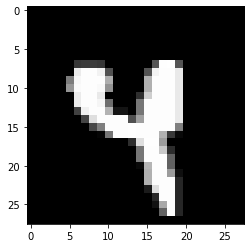

prediction: {} , result: {} 5 5


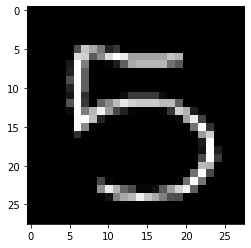

prediction: {} , result: {} 4 4


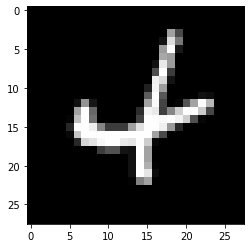

prediction: {} , result: {} 8 8


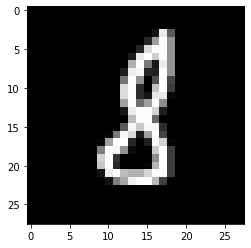

prediction: {} , result: {} 5 5


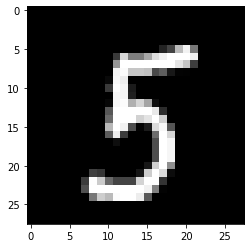

prediction: {} , result: {} 7 7


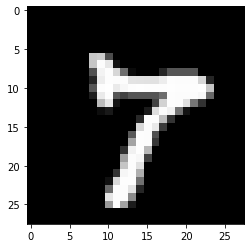

prediction: {} , result: {} 5 5


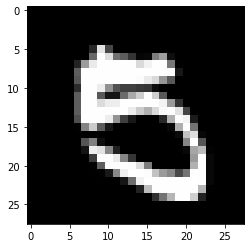

prediction: {} , result: {} 0 0


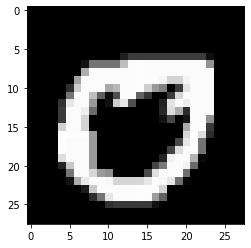

prediction: {} , result: {} 6 6


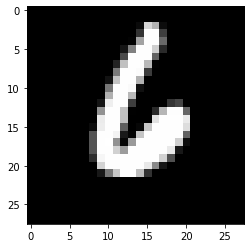

prediction: {} , result: {} 4 4


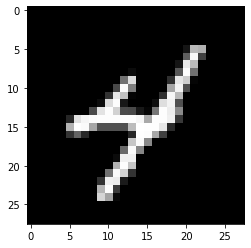

prediction: {} , result: {} 6 6


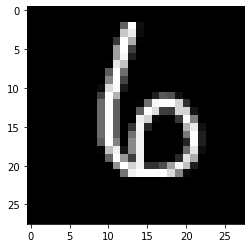

prediction: {} , result: {} 3 3


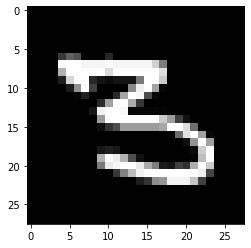

prediction: {} , result: {} 3 3


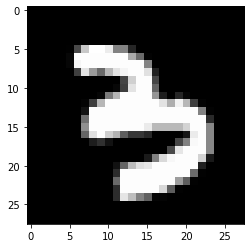

prediction: {} , result: {} 0 0


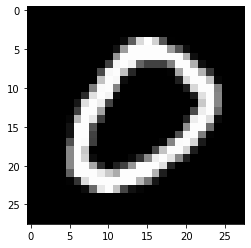

prediction: {} , result: {} 1 1


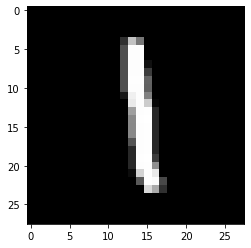

prediction: {} , result: {} 6 6


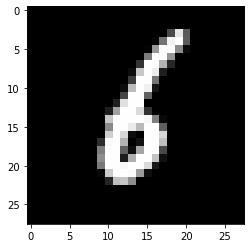

prediction: {} , result: {} 8 5


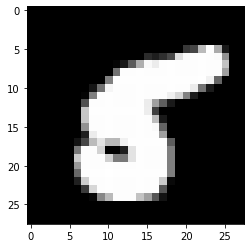

prediction: {} , result: {} 1 1


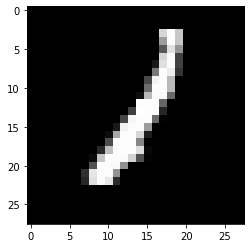

prediction: {} , result: {} 1 1


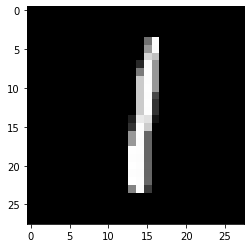

prediction: {} , result: {} 0 0


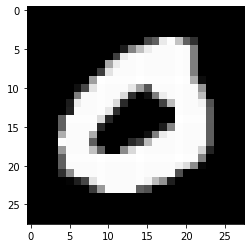

prediction: {} , result: {} 2 2


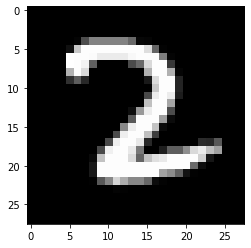

prediction: {} , result: {} 1 1


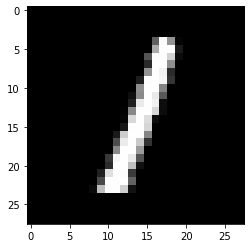

prediction: {} , result: {} 4 4


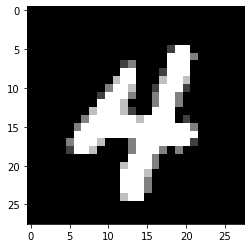

prediction: {} , result: {} 3 3


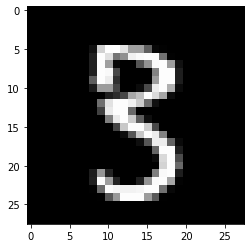

prediction: {} , result: {} 0 0


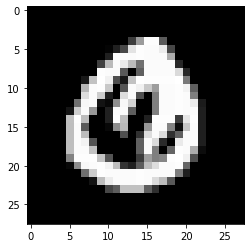

prediction: {} , result: {} 0 0


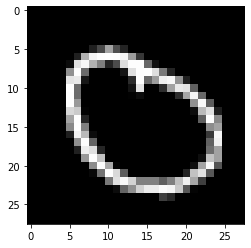

prediction: {} , result: {} 4 4


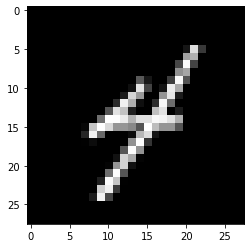

prediction: {} , result: {} 8 8


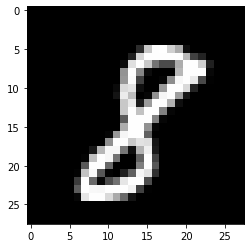

prediction: {} , result: {} 2 2


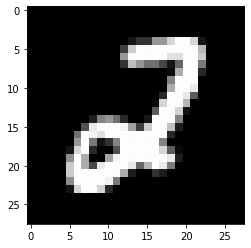

prediction: {} , result: {} 7 7


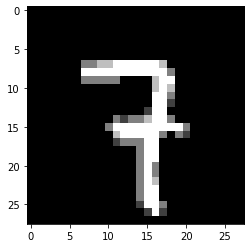

prediction: {} , result: {} 2 2


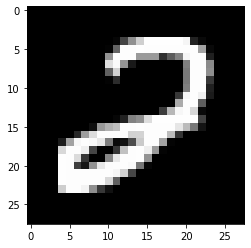

prediction: {} , result: {} 2 2


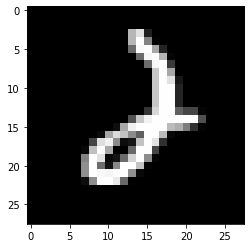

prediction: {} , result: {} 4 4


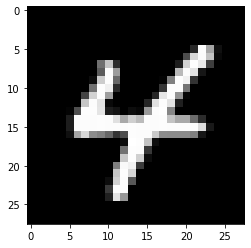

prediction: {} , result: {} 1 1


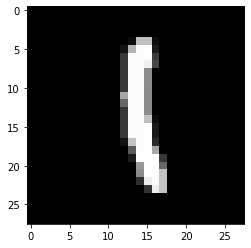

prediction: {} , result: {} 5 5


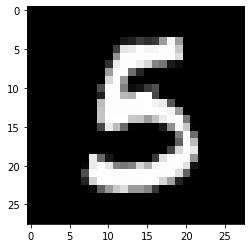

prediction: {} , result: {} 8 8


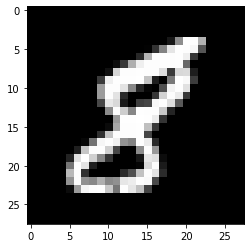

prediction: {} , result: {} 3 3


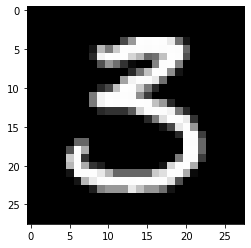

prediction: {} , result: {} 6 6


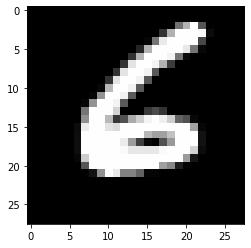

prediction: {} , result: {} 1 1


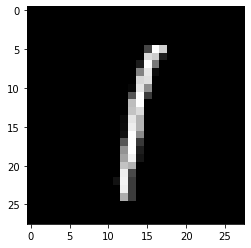

prediction: {} , result: {} 8 8


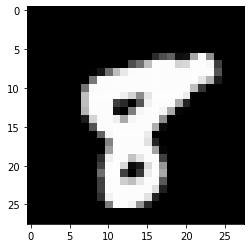

prediction: {} , result: {} 6 6


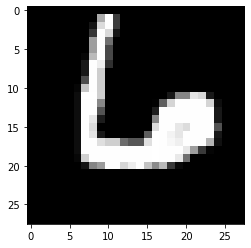

prediction: {} , result: {} 5 5


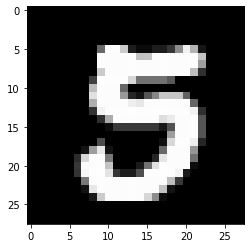

prediction: {} , result: {} 5 0


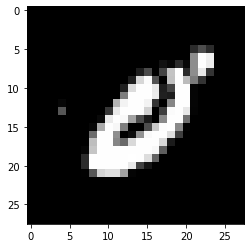

prediction: {} , result: {} 6 6


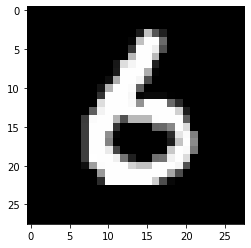

prediction: {} , result: {} 4 4


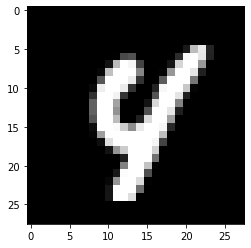

prediction: {} , result: {} 6 6


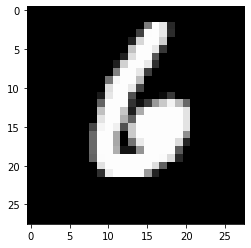

prediction: {} , result: {} 9 9


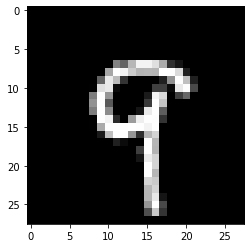

prediction: {} , result: {} 0 0


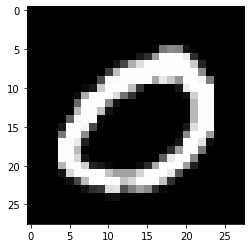

prediction: {} , result: {} 5 5


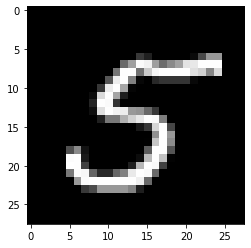

prediction: {} , result: {} 2 2


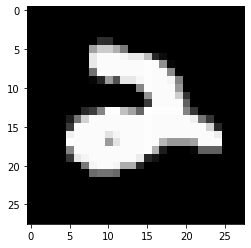

prediction: {} , result: {} 5 5


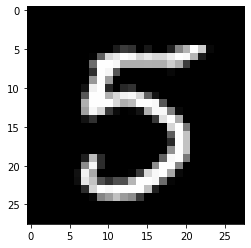

prediction: {} , result: {} 7 7


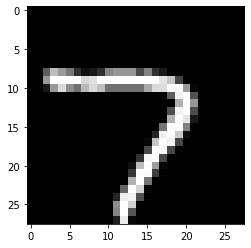

prediction: {} , result: {} 3 3


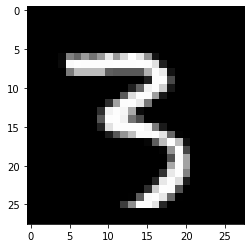

prediction: {} , result: {} 6 6


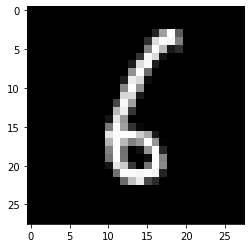

prediction: {} , result: {} 2 2


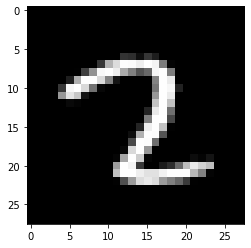

prediction: {} , result: {} 1 1


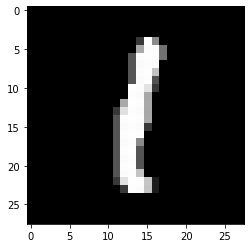

prediction: {} , result: {} 6 6


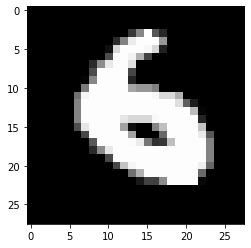

prediction: {} , result: {} 1 1


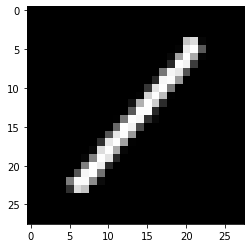

prediction: {} , result: {} 8 8


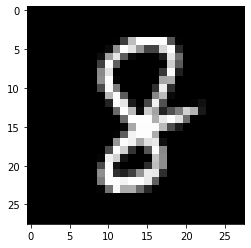

prediction: {} , result: {} 6 6


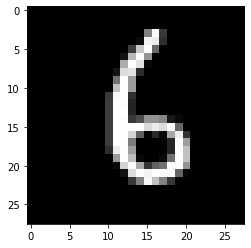

prediction: {} , result: {} 8 8


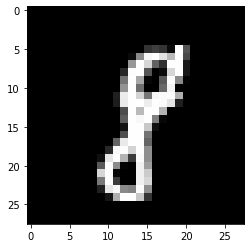

prediction: {} , result: {} 9 9


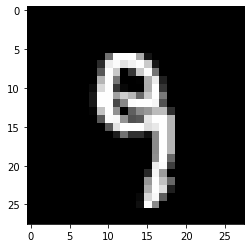

prediction: {} , result: {} 6 6


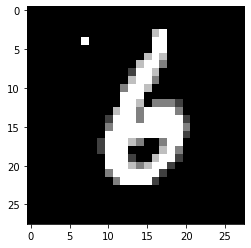

prediction: {} , result: {} 6 6


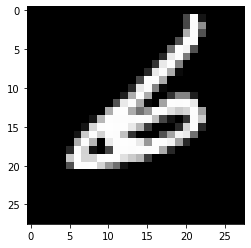

prediction: {} , result: {} 3 3


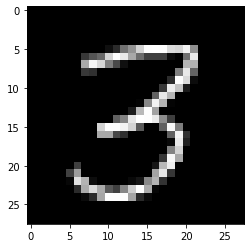

prediction: {} , result: {} 4 4


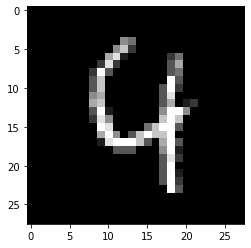

prediction: {} , result: {} 7 7


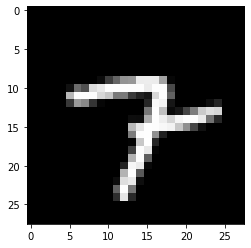

prediction: {} , result: {} 3 3


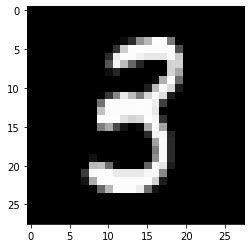

prediction: {} , result: {} 6 6


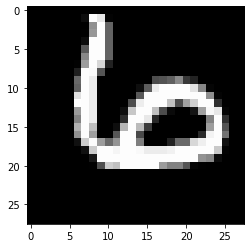

prediction: {} , result: {} 6 6


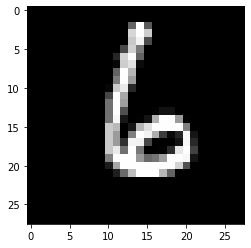

prediction: {} , result: {} 3 3


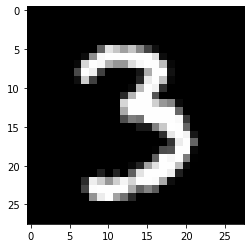

prediction: {} , result: {} 3 3


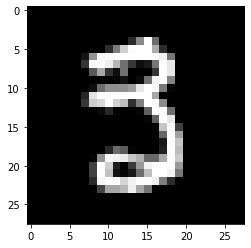

prediction: {} , result: {} 8 8


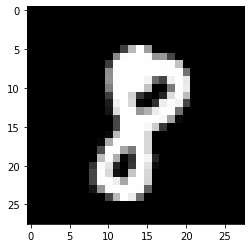

prediction: {} , result: {} 0 0


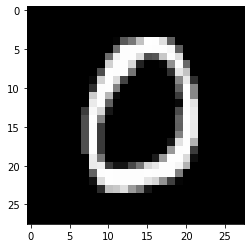

prediction: {} , result: {} 2 2


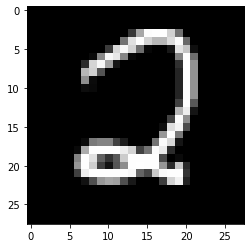

prediction: {} , result: {} 9 9


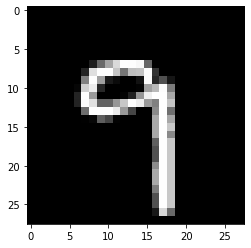

prediction: {} , result: {} 7 7


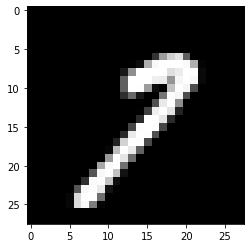

prediction: {} , result: {} 7 7


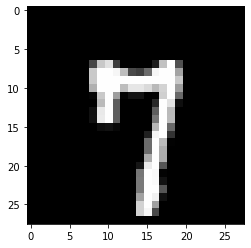

prediction: {} , result: {} 2 2


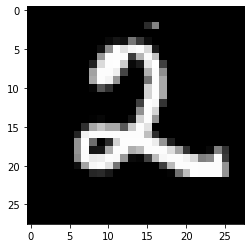

prediction: {} , result: {} 4 4


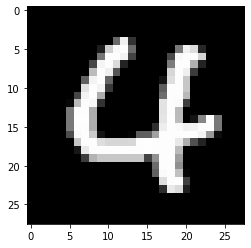

prediction: {} , result: {} 8 0


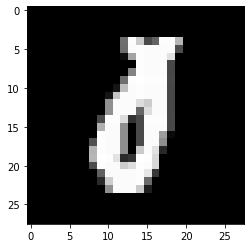

prediction: {} , result: {} 5 5


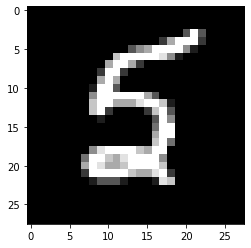

prediction: {} , result: {} 9 9


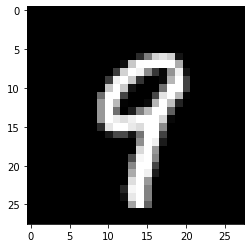

prediction: {} , result: {} 7 7


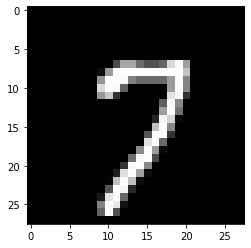

prediction: {} , result: {} 9 9


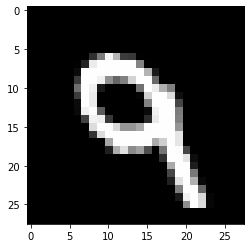

prediction: {} , result: {} 8 5


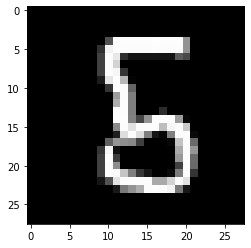

prediction: {} , result: {} 7 7


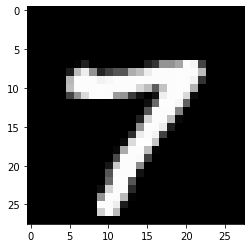

prediction: {} , result: {} 9 9


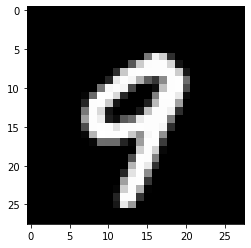

prediction: {} , result: {} 3 3


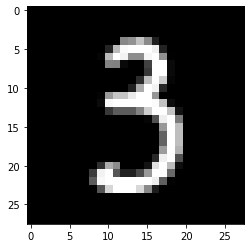

prediction: {} , result: {} 4 4


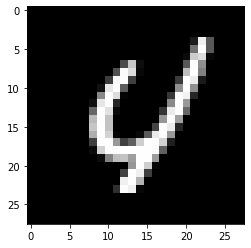

prediction: {} , result: {} 9 9


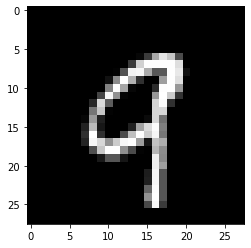

prediction: {} , result: {} 7 7


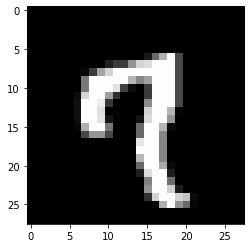

prediction: {} , result: {} 9 9


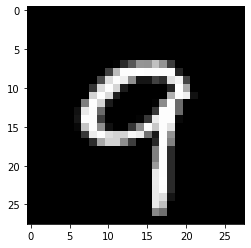

prediction: {} , result: {} 6 6


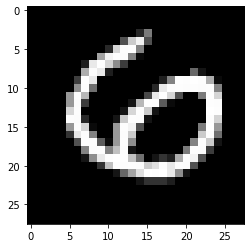

prediction: {} , result: {} 6 6


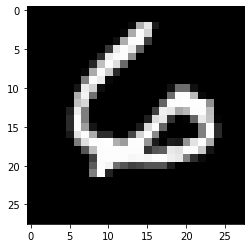

prediction: {} , result: {} 5 5


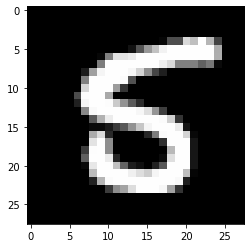

prediction: {} , result: {} 5 5


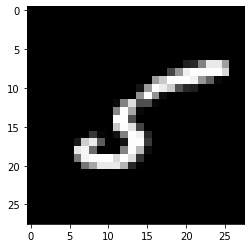

prediction: {} , result: {} 3 1


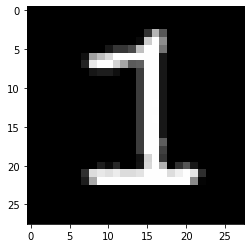

prediction: {} , result: {} 7 7


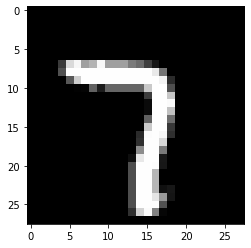

prediction: {} , result: {} 5 5


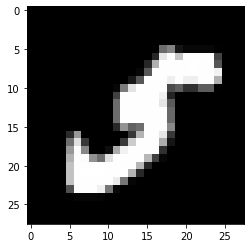

prediction: {} , result: {} 3 3


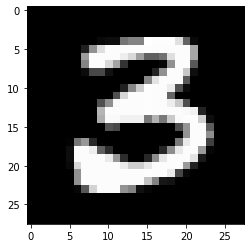

prediction: {} , result: {} 4 4


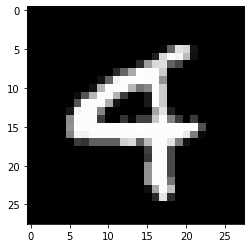

prediction: {} , result: {} 8 8


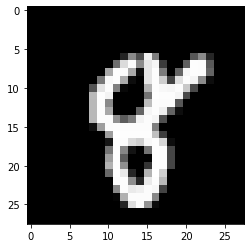

prediction: {} , result: {} 9 9


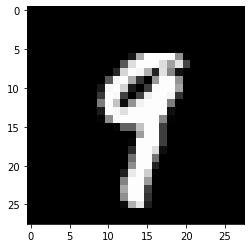

prediction: {} , result: {} 5 5


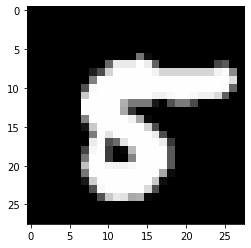

prediction: {} , result: {} 4 4


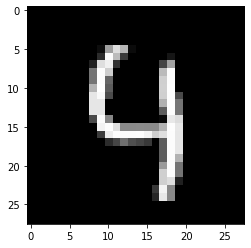

prediction: {} , result: {} 0 0


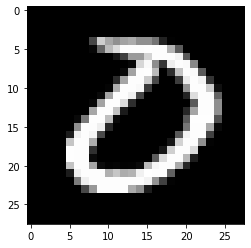

prediction: {} , result: {} 5 5


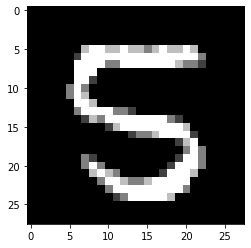

prediction: {} , result: {} 6 6


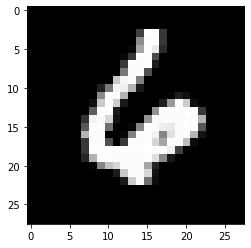

prediction: {} , result: {} 5 5


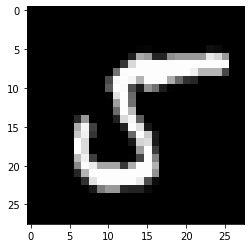

prediction: {} , result: {} 4 4


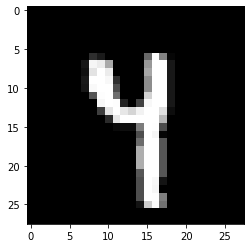

prediction: {} , result: {} 8 8


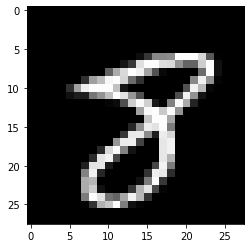

prediction: {} , result: {} 0 0


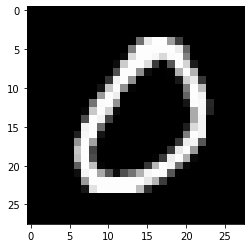

prediction: {} , result: {} 2 2


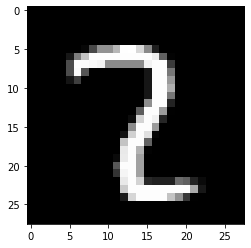

prediction: {} , result: {} 9 9


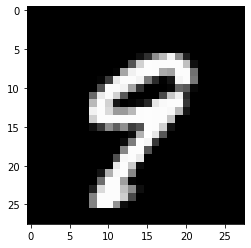

prediction: {} , result: {} 2 2


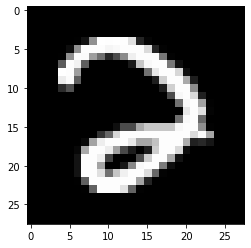

prediction: {} , result: {} 5 5


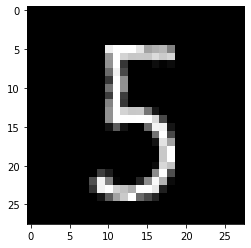

prediction: {} , result: {} 8 8


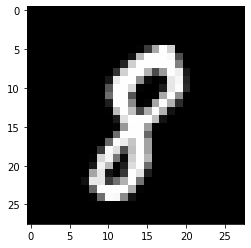

prediction: {} , result: {} 1 1


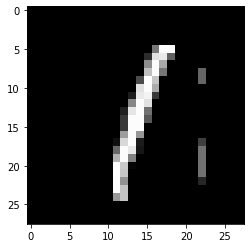

prediction: {} , result: {} 7 7


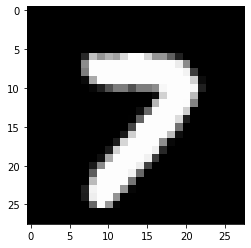

prediction: {} , result: {} 1 1


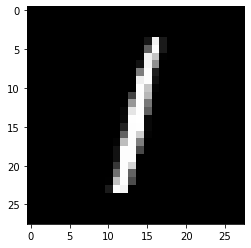

prediction: {} , result: {} 7 7


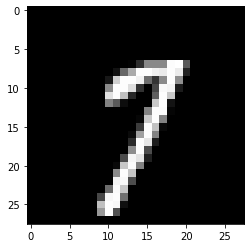

prediction: {} , result: {} 3 3


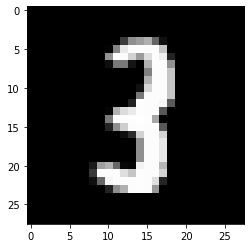

prediction: {} , result: {} 5 5


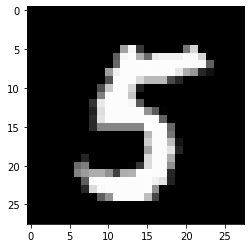

prediction: {} , result: {} 7 7


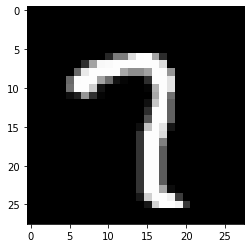

prediction: {} , result: {} 0 0


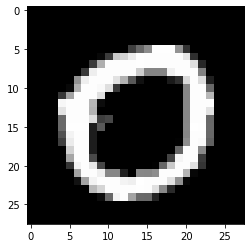

prediction: {} , result: {} 8 8


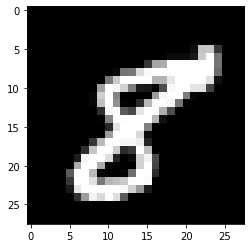

prediction: {} , result: {} 6 6


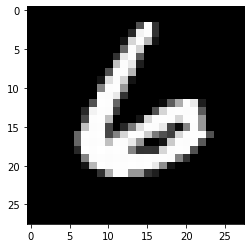

prediction: {} , result: {} 5 5


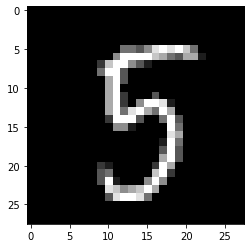

prediction: {} , result: {} 2 2


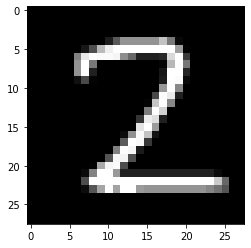

prediction: {} , result: {} 3 3


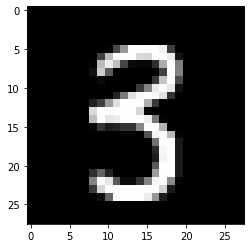

prediction: {} , result: {} 1 1


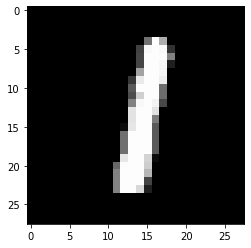

prediction: {} , result: {} 0 0


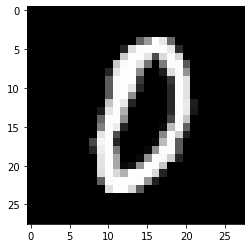

prediction: {} , result: {} 4 4


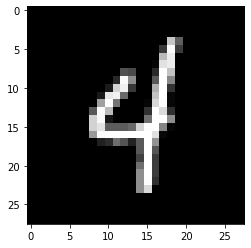

prediction: {} , result: {} 7 7


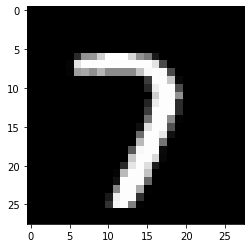

prediction: {} , result: {} 6 6


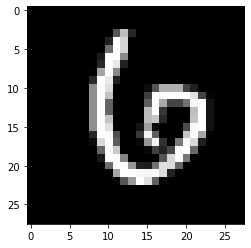

prediction: {} , result: {} 9 9


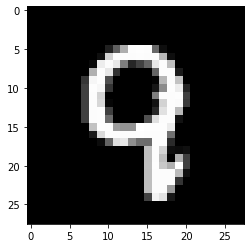

prediction: {} , result: {} 4 4


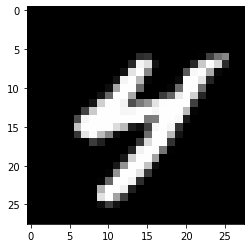

prediction: {} , result: {} 0 0


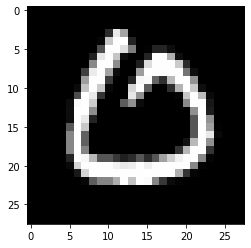

prediction: {} , result: {} 5 5


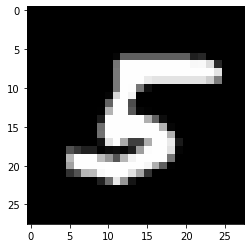

prediction: {} , result: {} 0 0


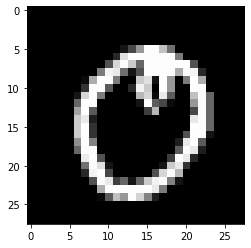

prediction: {} , result: {} 3 3


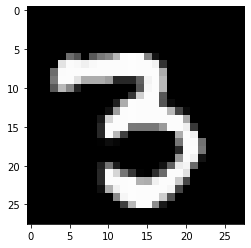

prediction: {} , result: {} 6 6


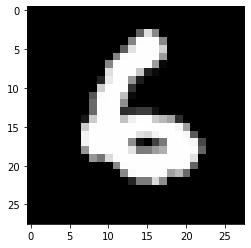

prediction: {} , result: {} 4 4


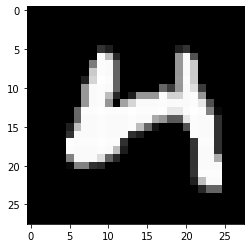

prediction: {} , result: {} 0 0


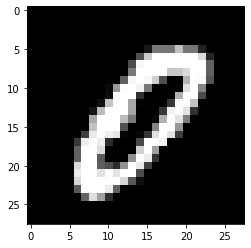

prediction: {} , result: {} 3 3


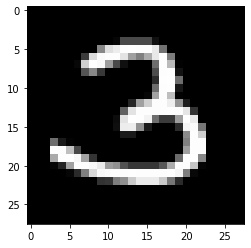

prediction: {} , result: {} 1 1


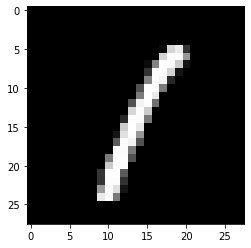

prediction: {} , result: {} 6 6


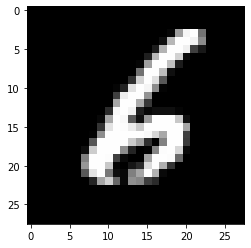

prediction: {} , result: {} 0 0


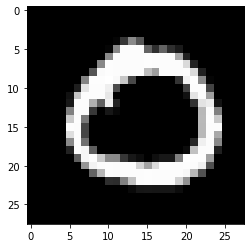

prediction: {} , result: {} 4 4


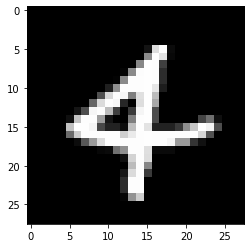

prediction: {} , result: {} 0 0


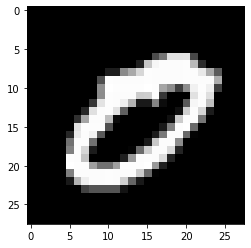

prediction: {} , result: {} 0 0


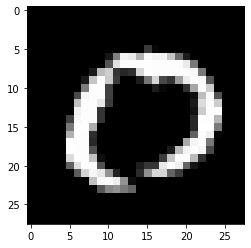

prediction: {} , result: {} 1 1


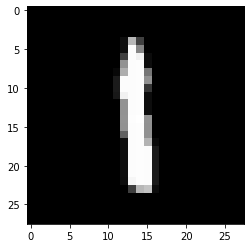

prediction: {} , result: {} 2 2


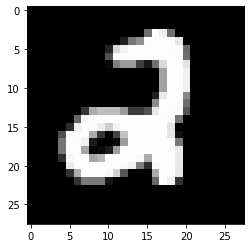

prediction: {} , result: {} 2 2


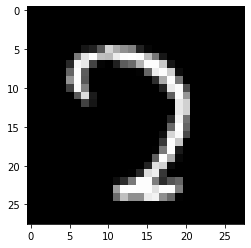

prediction: {} , result: {} 0 0


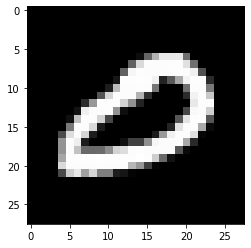

prediction: {} , result: {} 7 7


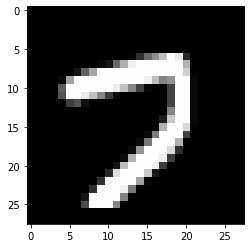

prediction: {} , result: {} 9 9


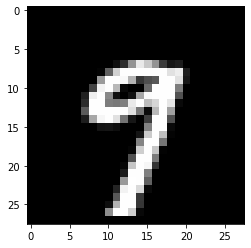

prediction: {} , result: {} 9 9


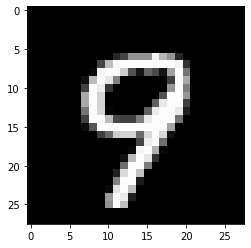

prediction: {} , result: {} 4 4


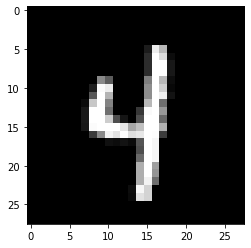

prediction: {} , result: {} 1 1


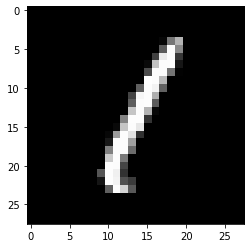

prediction: {} , result: {} 0 8


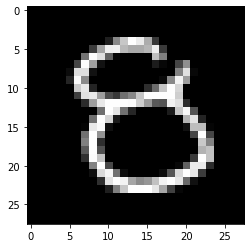

prediction: {} , result: {} 9 9


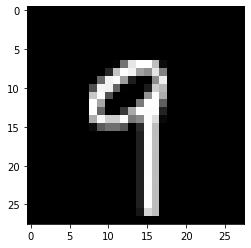

prediction: {} , result: {} 2 2


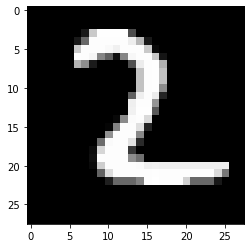

prediction: {} , result: {} 2 2


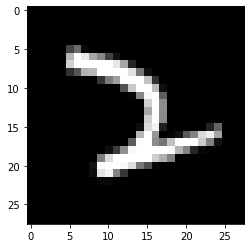

prediction: {} , result: {} 1 1


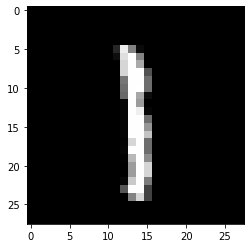

prediction: {} , result: {} 4 4


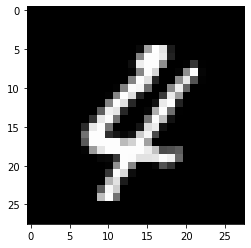

prediction: {} , result: {} 9 9


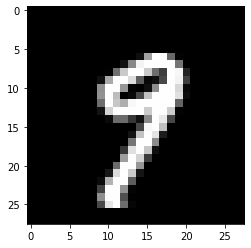

prediction: {} , result: {} 2 2


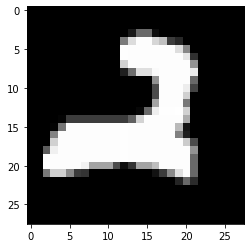

prediction: {} , result: {} 7 7


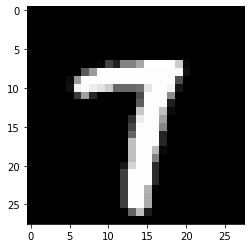

prediction: {} , result: {} 3 3


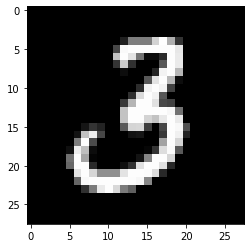

prediction: {} , result: {} 0 0


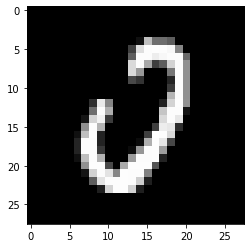

prediction: {} , result: {} 5 5


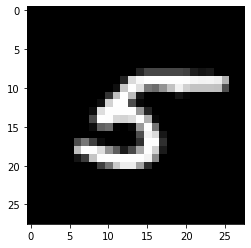

prediction: {} , result: {} 0 0


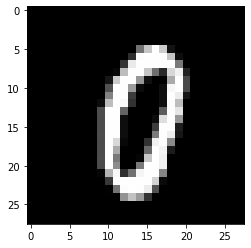

prediction: {} , result: {} 2 2


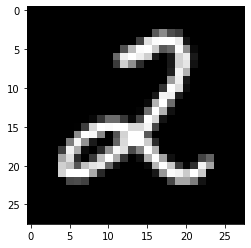

prediction: {} , result: {} 0 0


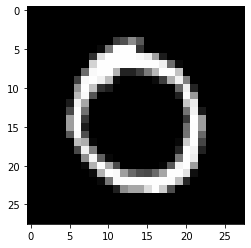

prediction: {} , result: {} 2 2


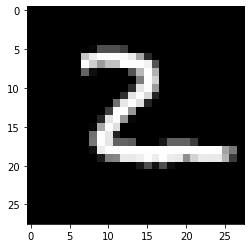

prediction: {} , result: {} 9 9


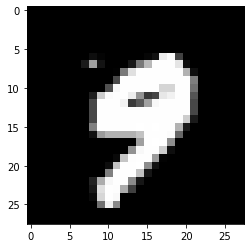

prediction: {} , result: {} 3 5


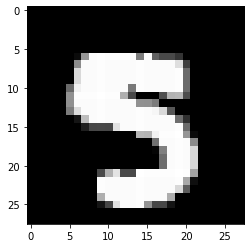

prediction: {} , result: {} 2 2


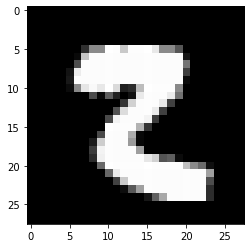

prediction: {} , result: {} 4 4


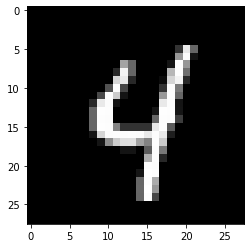

prediction: {} , result: {} 3 3


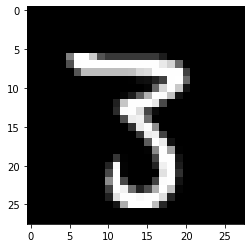

prediction: {} , result: {} 4 4


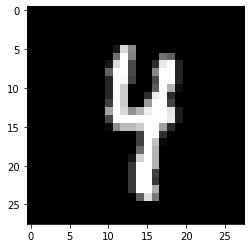

prediction: {} , result: {} 9 9


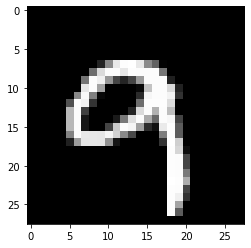

prediction: {} , result: {} 2 2


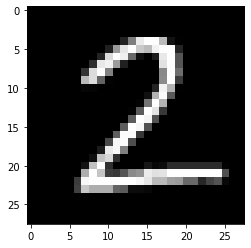

prediction: {} , result: {} 5 5


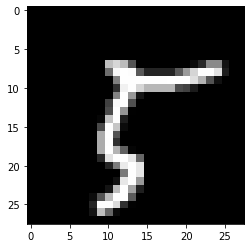

prediction: {} , result: {} 3 3


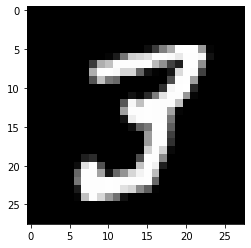

prediction: {} , result: {} 8 8


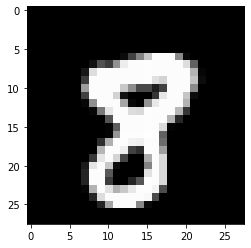

prediction: {} , result: {} 7 7


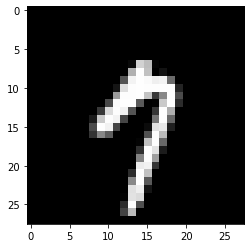

prediction: {} , result: {} 8 8


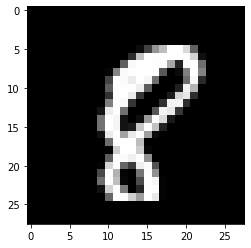

prediction: {} , result: {} 5 5


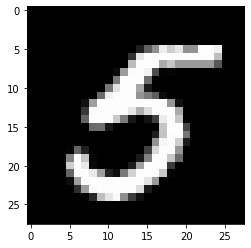

prediction: {} , result: {} 8 8


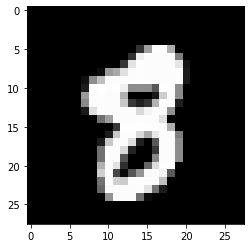

prediction: {} , result: {} 0 0


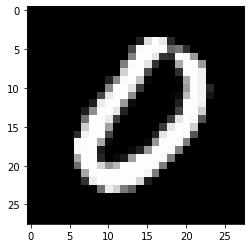

prediction: {} , result: {} 0 0


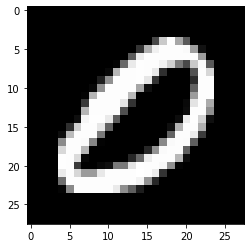

prediction: {} , result: {} 1 1


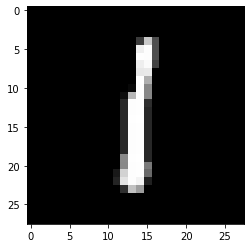

prediction: {} , result: {} 6 6


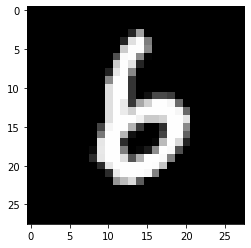

prediction: {} , result: {} 7 7


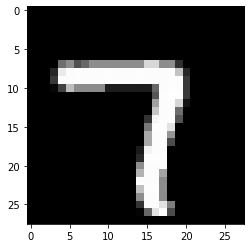

prediction: {} , result: {} 9 9


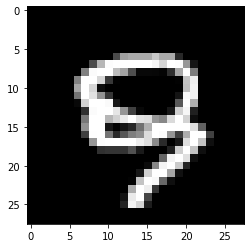

prediction: {} , result: {} 1 1


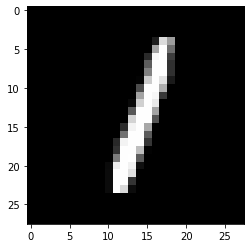

prediction: {} , result: {} 2 2


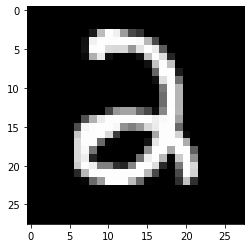

prediction: {} , result: {} 5 5


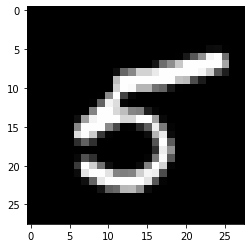

prediction: {} , result: {} 1 1


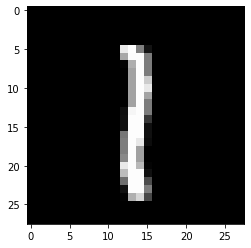

prediction: {} , result: {} 6 6


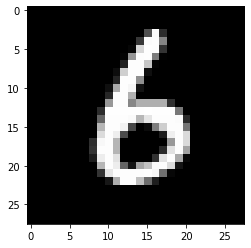

prediction: {} , result: {} 5 5


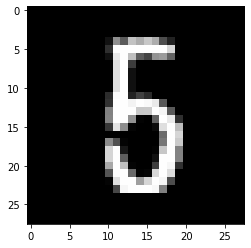

prediction: {} , result: {} 5 6


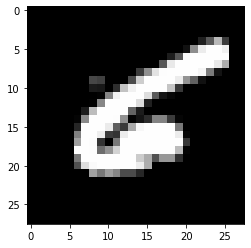

prediction: {} , result: {} 0 0


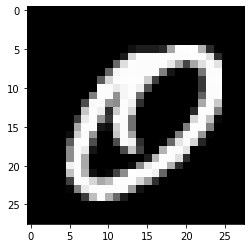

prediction: {} , result: {} 2 2


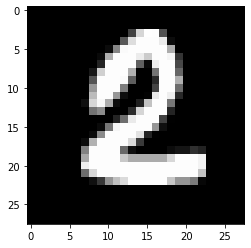

prediction: {} , result: {} 2 2


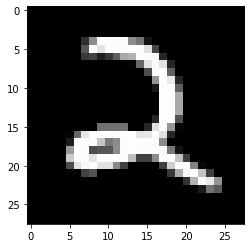

prediction: {} , result: {} 6 6


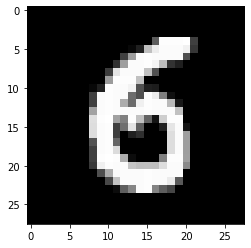

prediction: {} , result: {} 6 6


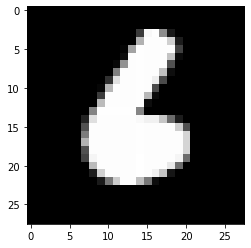

prediction: {} , result: {} 2 2


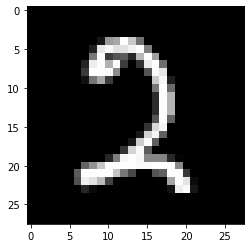

prediction: {} , result: {} 8 8


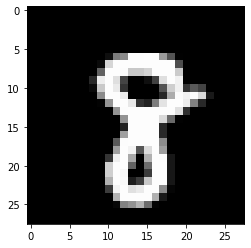

prediction: {} , result: {} 2 2


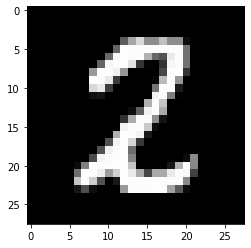

prediction: {} , result: {} 9 9


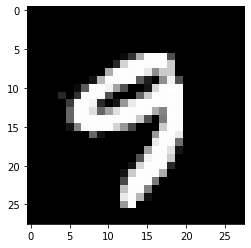

prediction: {} , result: {} 4 4


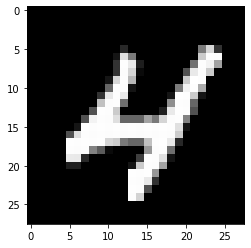

prediction: {} , result: {} 2 2


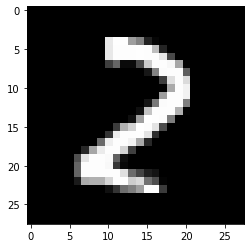

prediction: {} , result: {} 0 0


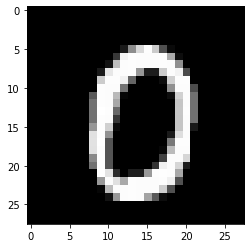

prediction: {} , result: {} 1 1


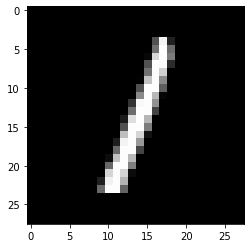

prediction: {} , result: {} 5 5


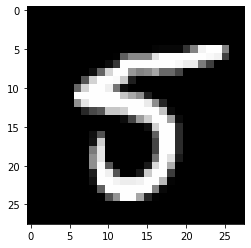

prediction: {} , result: {} 7 7


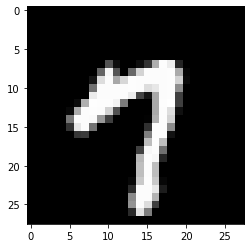

prediction: {} , result: {} 4 4


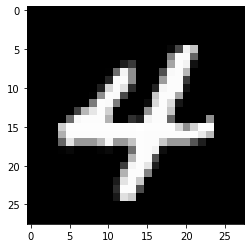

prediction: {} , result: {} 6 6


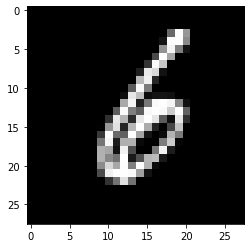

prediction: {} , result: {} 5 5


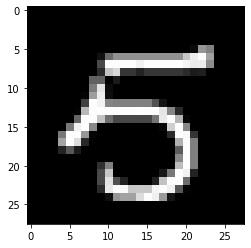

prediction: {} , result: {} 1 4


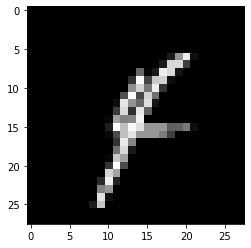

prediction: {} , result: {} 8 8


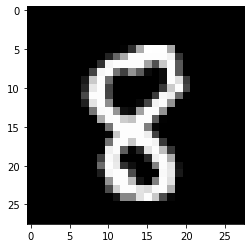

prediction: {} , result: {} 3 3


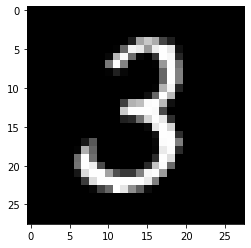

prediction: {} , result: {} 3 3


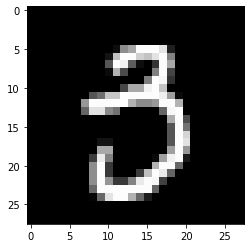

prediction: {} , result: {} 8 8


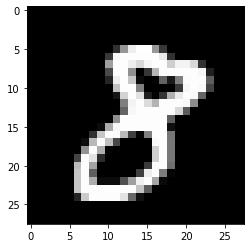

prediction: {} , result: {} 2 2


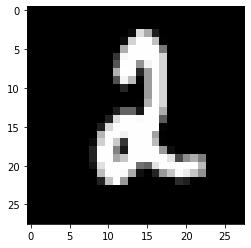

prediction: {} , result: {} 8 8


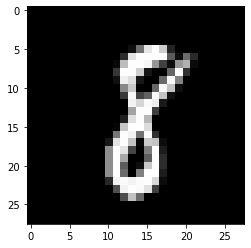

prediction: {} , result: {} 8 8


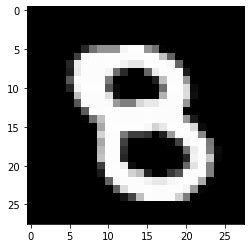

prediction: {} , result: {} 7 7


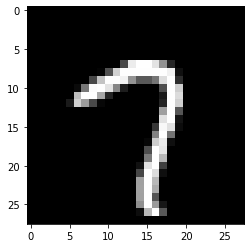

prediction: {} , result: {} 4 4


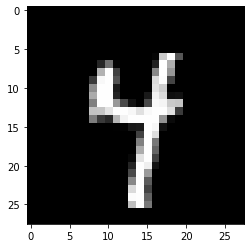

prediction: {} , result: {} 0 0


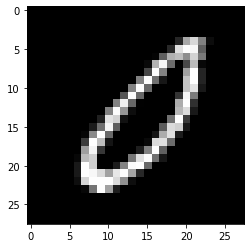

prediction: {} , result: {} 1 1


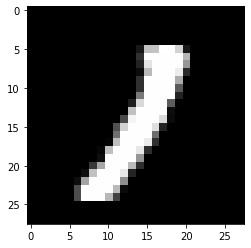

prediction: {} , result: {} 1 1


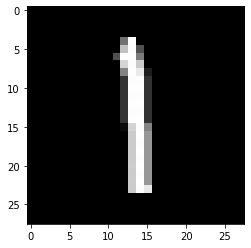

prediction: {} , result: {} 4 4


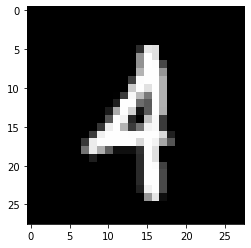

prediction: {} , result: {} 7 7


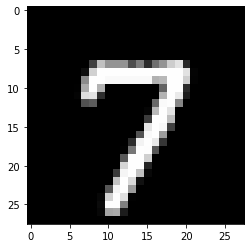

prediction: {} , result: {} 3 3


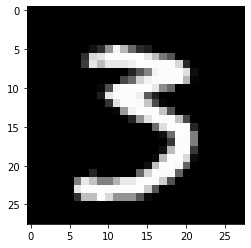

prediction: {} , result: {} 8 8


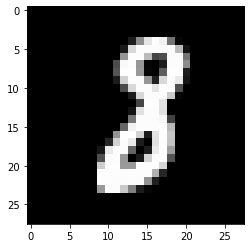

prediction: {} , result: {} 6 6


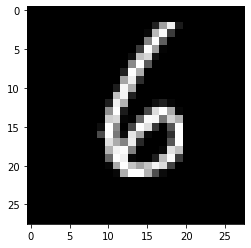

prediction: {} , result: {} 5 5


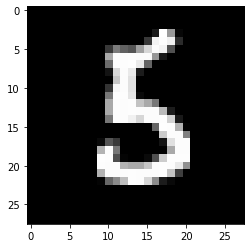

prediction: {} , result: {} 0 0


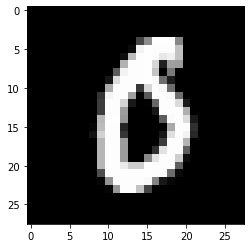

prediction: {} , result: {} 9 9


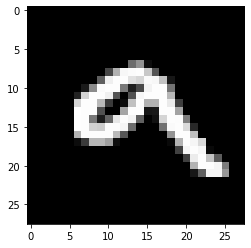

prediction: {} , result: {} 4 4


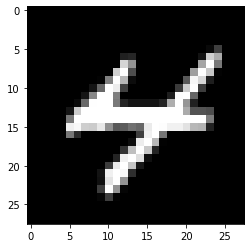

prediction: {} , result: {} 0 0


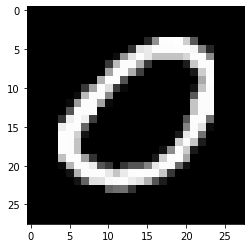

prediction: {} , result: {} 5 5


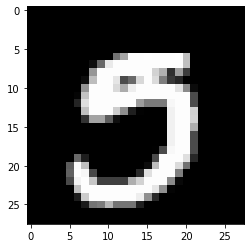

prediction: {} , result: {} 3 3


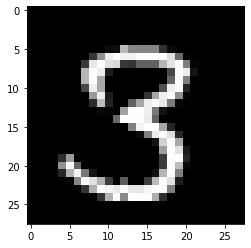

prediction: {} , result: {} 9 9


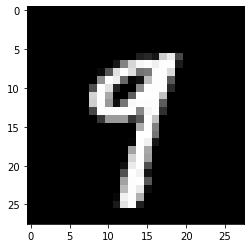

prediction: {} , result: {} 5 5


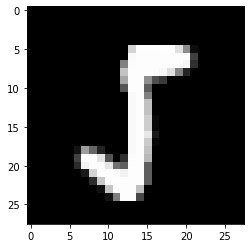

prediction: {} , result: {} 0 0


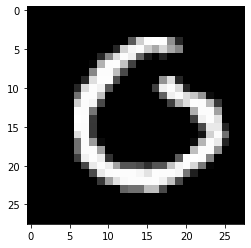

prediction: {} , result: {} 6 6


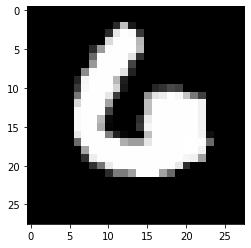

prediction: {} , result: {} 1 1


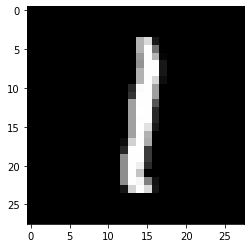

prediction: {} , result: {} 7 7


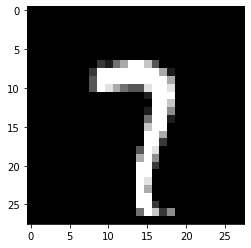

prediction: {} , result: {} 5 5


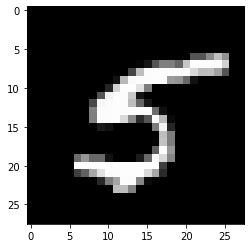

prediction: {} , result: {} 0 0


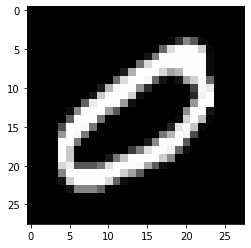

prediction: {} , result: {} 3 3


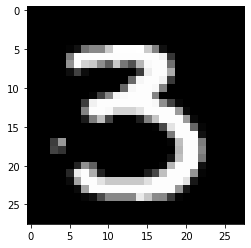

prediction: {} , result: {} 3 3


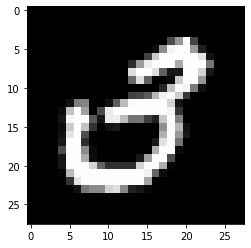

prediction: {} , result: {} 2 2


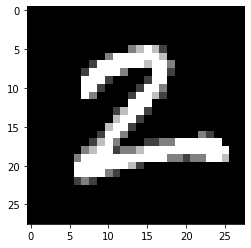

prediction: {} , result: {} 2 2


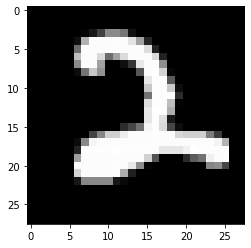

prediction: {} , result: {} 4 8


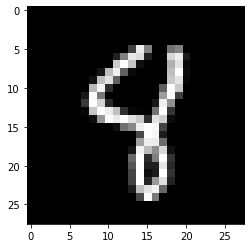

prediction: {} , result: {} 7 7


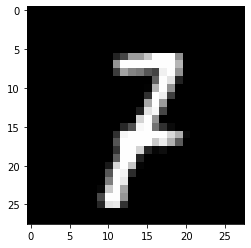

prediction: {} , result: {} 8 8


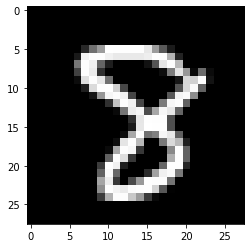

prediction: {} , result: {} 0 0


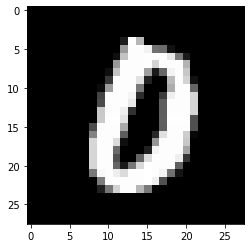

prediction: {} , result: {} 9 9


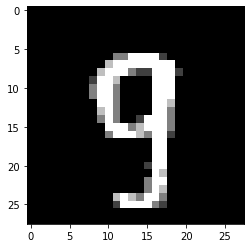

prediction: {} , result: {} 5 5


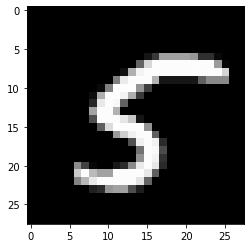

prediction: {} , result: {} 8 8


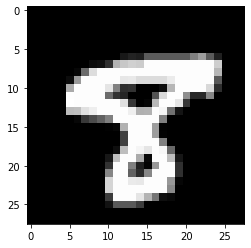

prediction: {} , result: {} 5 5


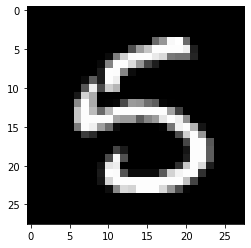

prediction: {} , result: {} 5 5


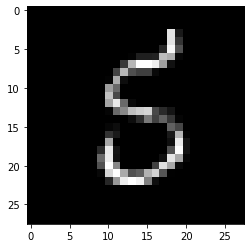

prediction: {} , result: {} 4 4


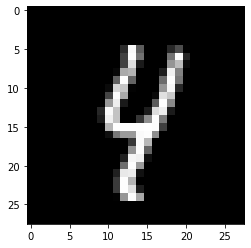

prediction: {} , result: {} 0 0


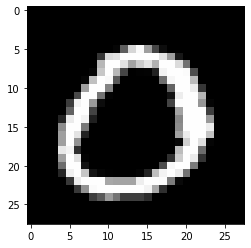

prediction: {} , result: {} 1 1


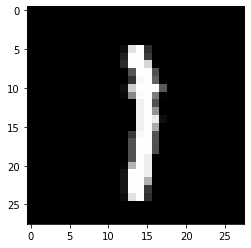

prediction: {} , result: {} 6 6


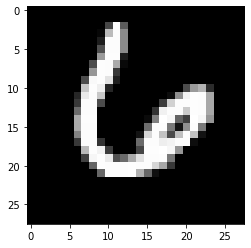

prediction: {} , result: {} 9 9


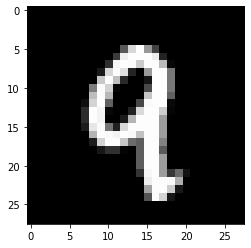

prediction: {} , result: {} 4 4


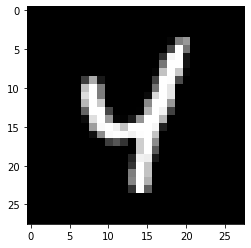

prediction: {} , result: {} 9 9


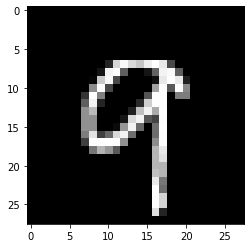

prediction: {} , result: {} 3 3


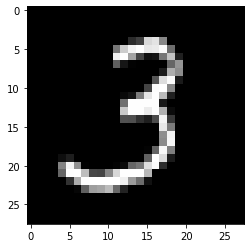

prediction: {} , result: {} 6 6


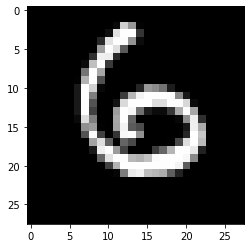

prediction: {} , result: {} 6 6


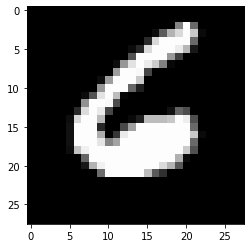

prediction: {} , result: {} 6 6


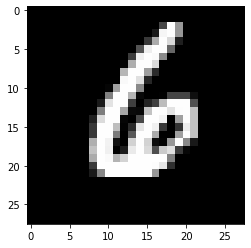

prediction: {} , result: {} 7 7


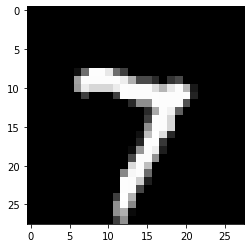

prediction: {} , result: {} 8 8


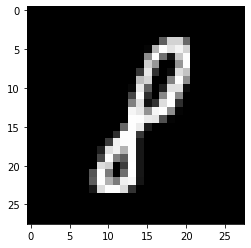

prediction: {} , result: {} 3 3


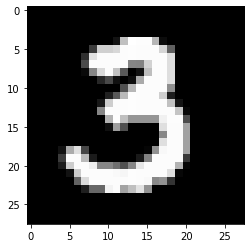

prediction: {} , result: {} 1 1


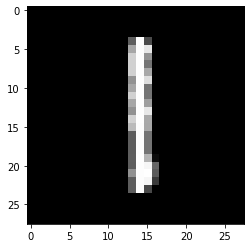

prediction: {} , result: {} 1 1


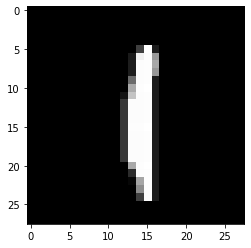

prediction: {} , result: {} 8 8


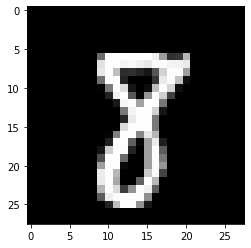

prediction: {} , result: {} 8 3


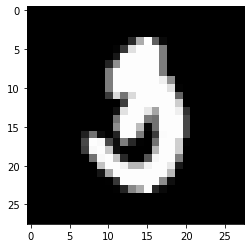

prediction: {} , result: {} 2 2


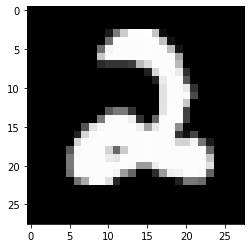

prediction: {} , result: {} 0 0


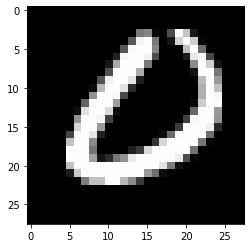

prediction: {} , result: {} 3 3


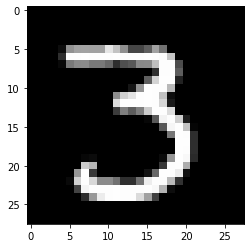

prediction: {} , result: {} 7 7


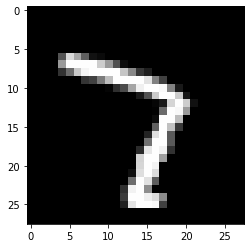

prediction: {} , result: {} 3 3


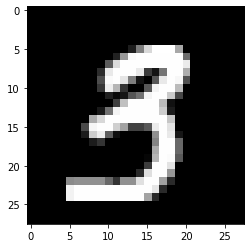

prediction: {} , result: {} 1 1


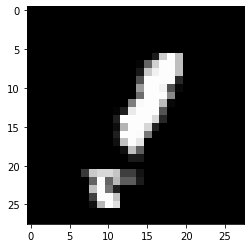

prediction: {} , result: {} 0 0


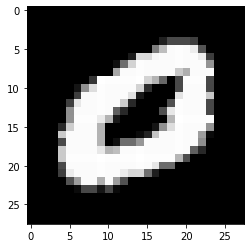

prediction: {} , result: {} 2 2


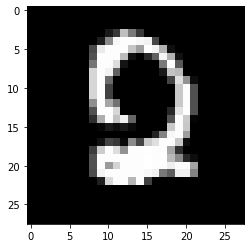

prediction: {} , result: {} 6 0


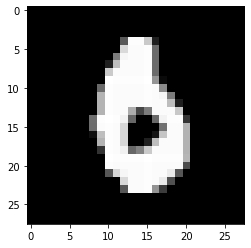

prediction: {} , result: {} 5 5


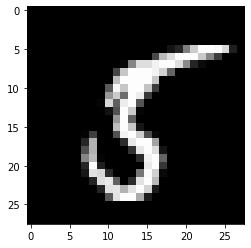

prediction: {} , result: {} 5 5


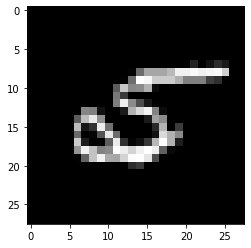

prediction: {} , result: {} 1 1


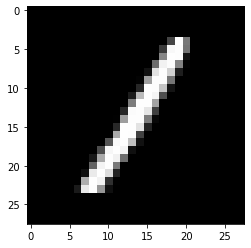

prediction: {} , result: {} 0 0


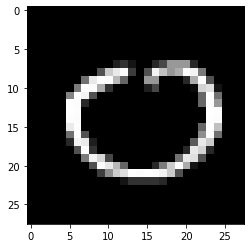

prediction: {} , result: {} 8 8


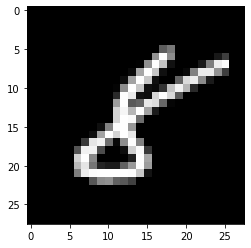

prediction: {} , result: {} 0 0


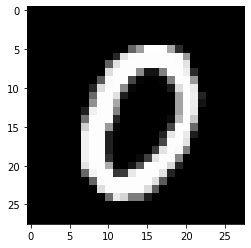

prediction: {} , result: {} 1 1


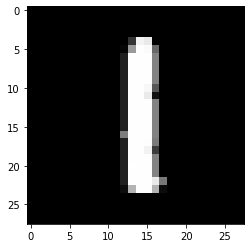

prediction: {} , result: {} 6 6


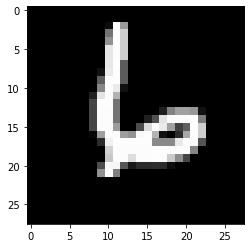

prediction: {} , result: {} 7 7


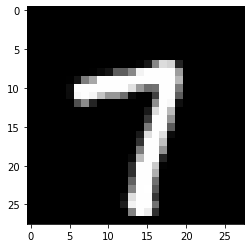

prediction: {} , result: {} 5 5


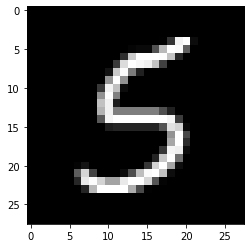

prediction: {} , result: {} 6 6


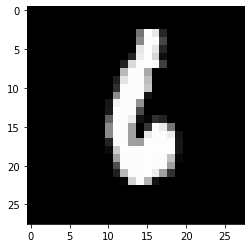

prediction: {} , result: {} 0 0


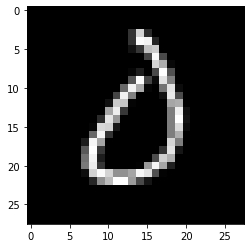

prediction: {} , result: {} 8 8


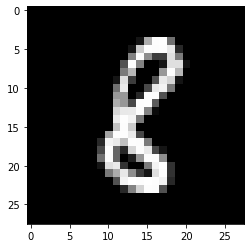

prediction: {} , result: {} 3 3


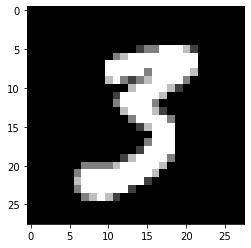

prediction: {} , result: {} 8 8


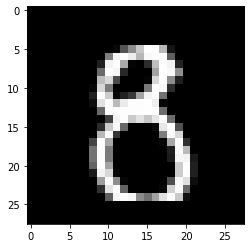

prediction: {} , result: {} 3 3


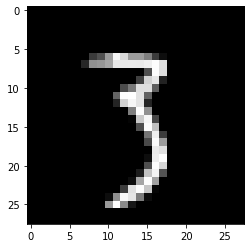

prediction: {} , result: {} 6 6


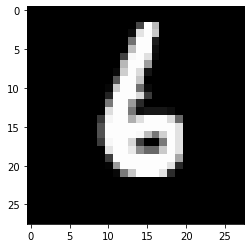

prediction: {} , result: {} 5 8


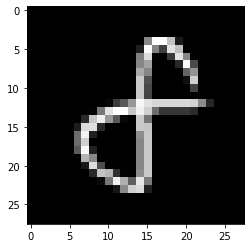

prediction: {} , result: {} 7 7


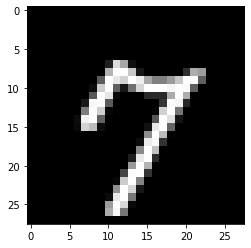

prediction: {} , result: {} 4 4


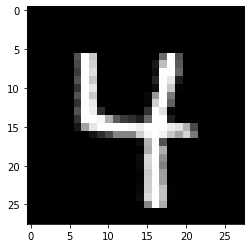

prediction: {} , result: {} 7 7


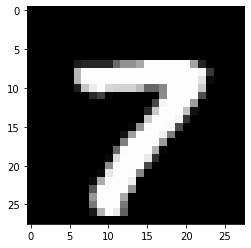

prediction: {} , result: {} 9 9


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-3f0b11a45155>", line 9, in <module>
    plt.show()
  File "/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py", line 272, in show
    return _show(*args, **kw)
  File "/usr/local/lib/python3.8/dist-packages/ipykernel/pylab/backend_inline.py", line 41, in show
    display(
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/display.py", line 320, in display
    publish_display_data(data=format_dict, metadata=md_dict, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/display.py", line 119, in publish_display_data
    display_pub.publish(
  File "/usr/local/lib/python3.8/dist-packages/ipykernel/zmqshell.py", line 112, in publish
    self._flush_streams()
  File "/usr/local/lib/python3.8/dist-packages/ipykernel/zmqshell.py", line 80, in _

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
for i in range(len(y_pred)):
 sample = i
 image = data_test2[sample]
 print("prediction: {} , result: {}",y_pred[i],labels_test[i])
# plot the sample
 fig = plt.figure
 plt.imshow(image, cmap='gray')
 plt.show()